<a href="https://colab.research.google.com/github/abhikomal/Mercedes-Benz-GreenerManufacturing-solution-using-Bottstrap-sampling/blob/master/sangleabhijit27_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mercedes-Benz Greener Manufacturing**
Can you cut the time a Mercedes-Benz spends on the test bench?

## **Overview**
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

About this Competition

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/

File Description

Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set 

test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file

sample_submission.csv - a sample submission file in the correct format


## **Problem Statement**
The objective of the Mercedes-Benz Greener Manufacturing competition is to develop a machine learning model that can accurately predict the time a car will spend on the test bench based on the vehicle configuration. 

The vehicle configuration is defined as the set of customization options and features selected for the particular vehicle. 

The motivation behind the problem is that an accurate model will be able to reduce the total time spent testing vehicles by allowing cars with similar testing configurations to be run successively. 

This problem is an example of a machine learning regression task because it requires predicting a continuous target variable (the duration of the test) based on one or more explanatory variables  (the configuration of the vehicle).

 This problem is also a supervised task because the targets for the training data are known ahead of time and the model will learn based on labeled data.

1-Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench.

2- Mercedes-Benz car features to predict the time it takes to pass testing. machine learning alogoritham should contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

Exploratory data analysis is a process of using basic summary statistics and visualizations to gain intuition about the features of the data. This should always be done before applying predictive modeling algorithms to your data.

https://classroom.appliedcourse.com/classrooms/e69a594E/assignments/3DALGBOL/

### **Importing all necessary files**

In [ ]:
#https://www.hackerearth.com/practice/machine-learning/advanced-techniques/winning-tips-machine-learning-competitions-kazanova-current-kaggle-3/tutorial/
import numpy as np
import pandas as pd
#

import matplotlib.pyplot as plt
# We import seaborn. A powerful plotting library built on top of matplotlib. We’ll use this for creating some insightful plots.
import seaborn as sns
# We import seaborn. A powerful plotting library built on top of matplotlib. We’ll use this for creating some insightful plots.
% matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn import preprocessing
from sklearn.decomposition import PCA, FastICA
seed =45
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Python may throw some annoying warnings, we stop this using the ignore_warns function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.1 Loading train & test data**

In [ ]:
# We could find total number of rows and columns in the train data using “.shape”.
train_df = pd.read_csv(r'/content/drive/My Drive/mercedes data/train.csv.csv')
test_df = pd.read_csv(r'/content/drive/My Drive/mercedes data/test.csv.csv')
print('Train dataset shape = ', train_df.shape)
print('Test dataset shape = ',test_df.shape)

Train dataset shape =  (4209, 378)
Test dataset shape =  (4209, 377)


In [ ]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


There are 4209 datapoints or cars that have been subjected to testing

There are 377 features or parts or subprocesses that were being tested


The ID feature represents unique cars which are subjected to testing. 

“y” represents the target variable which will be predicted on the test data.

X0, X1, X2, X3, X4, X5, X6 and X8 are categorical features which might probably represent types of sub-assembly within a main assembly.

 By the looks of it, rest of the features contain only binary values (0 & 1) which probably represents if the feature was tested or not for a particular car.


In [ ]:
train_df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

Min time that a car spent during testing was 72.11 seconds and the maximum time taken was 265.32 seconds.

25% of the cars i.e around 1052 among 4209 cars had testing times less than 90.82 seconds

Half the cars i.e 2104 had testing times less than 99.15 seconds and three-fourth of the cars had testing times less than 109.01 seconds or 1052 (25%) cars had testing times greater than 109.01 seconds.

The IQR(Interquartile Range) i.e the difference between 75th and 25th percentile values was 18.19 seconds.

Also, the average time taken by each car to pass the testing phase was 100.67 seconds

In [ ]:
#head()function of pandas library which returns first five observations of the dataset
# “.tail()” returns last five observations of the data set.
#so we could observe our dataset columns and values
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
#https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


there is no missing value


Now checking for NaN value if any

In [ ]:
#In order to check null values in Pandas DataFrame, we use isnull() function this function return dataframe of Boolean values which are True for NaN values.
nan_rows = train_df[train_df.isnull().any(axis=1)]
nan_rows

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [ ]:
nan_rows = test_df[test_df.isnull().any(axis=1)]
nan_rows

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


thereis no NaN value both of train and test data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### **Data type of columns**

In [ ]:
#ref: https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
#ref: https://www.geeksforgeeks.org/python-pandas-index-to_series/
d_types = train_df.columns.to_series().groupby(train_df.dtypes).groups
d_types

{dtype('int64'): Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=369),
 dtype('float64'): Index(['y'], dtype='object'),
 dtype('O'): Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')}

It can be observed that column y is of float type

Columns from X0 to X6 & X8 are object type and hence they are categorical features

Rest of the columns are of integer type


In [ ]:
datatype = train_df.dtypes.reset_index()
datatype.columns = ["Count", "Column Type"]
datatype.groupby("Column Type").aggregate('count').reset_index()
# This is important because I want to know what kind of data I’m dealing with and I also want to make sure pandas inferred my data types correctly.

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


As you can observe, there are 369 int64 columns corresponding to binary and ID features, 1 float64 column corresponding to the target variable and 8 object columns which are nothing but categorical features as mentioned earlier.

## **Univariate Analysis of the target variable(y)**

Target Variable:

"y" is the variable we need to predict. So let us do some analysis on this variable first

In [ ]:
train_df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

Min time that a car spent during testing was 72.11 seconds and the maximum time taken was 265.32 seconds.

25% of the cars i.e around 1052 among 4209 cars had testing times less than 90.82 seconds

Half the cars i.e 2104 had testing times less than 99.15 seconds and three-fourth of the cars had testing times less than 109.01 seconds or 1052 (25%) cars had testing times greater than 109.01 seconds.

The IQR(Interquartile Range) i.e the difference between 75th and 25th percentile values was 18.19 seconds.

Also, the average time taken by each car to pass the testing phase was 100.67 seconds

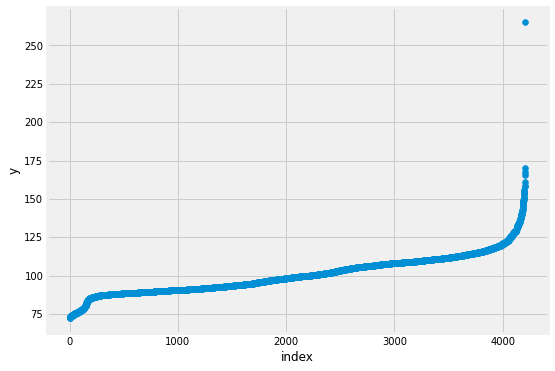

In [ ]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Target distribution')

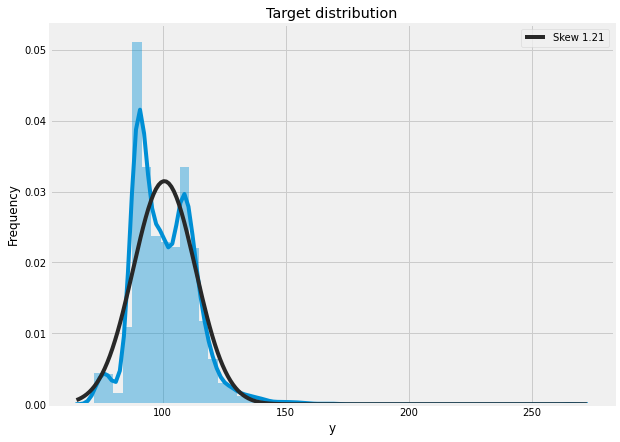

In [ ]:
#https://www.kaggle.com/wangsijia/a-complete-eda-with-a-terrible-baseline
from statsmodels.formula.api import ols
from scipy import stats
plt.figure(figsize=(9, 7))
sns.distplot(train_df['y'] , fit=stats.norm);
plt.legend(['Skew {:.2f}'.format(train_df['y'].skew())], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

Text(0.5, 1.0, 'Target distribution')

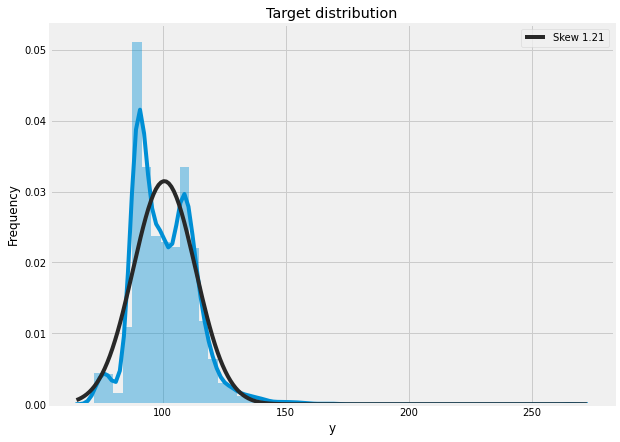

In [ ]:
plt.figure(figsize=(9, 7))
sns.distplot(train_df['y'] , fit=stats.norm);
plt.legend(['Skew {:.2f}'.format(train_df['y'].skew())], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

Text(0.5, 1.0, 'Boxplot of time')

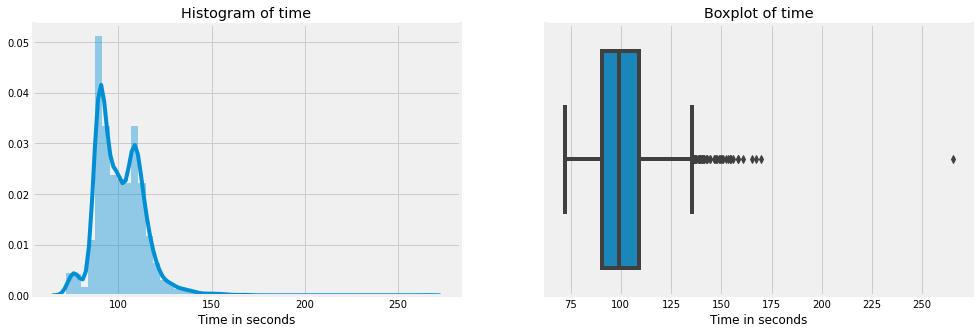

In [ ]:
#https://www.kaggle.com/kulkarnivishwanath/mercedes-benz-green-manufacturing-eda-modelling
#Distribution of y
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_df['y'])
plt.xlabel('Time in seconds')
plt.title('Histogram of time')

plt.subplot(1,2,2)

sns.boxplot(train_df['y'])
plt.xlabel('Time in seconds')
plt.title('Boxplot of time')

As observed form the above plot, the pdf is skewed to its right (positive skewed).

Most of the cars have a testing time of around 90.

From histogram we could observed that mean value of time is 100 means avg time required for testing is near about 100s.
From box plot we are ab;e to see operations which requires more than 150s are can be treated as outliers

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 180: 1


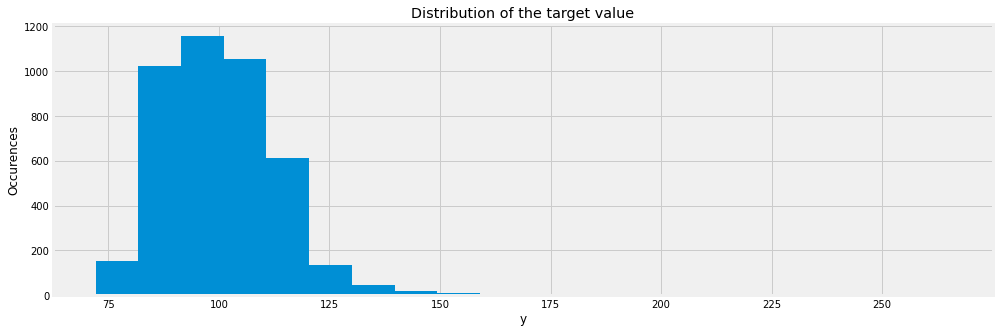

In [ ]:
y_train = train_df['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('y')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

here we have a pretty standard distribution here, which is centred around almost exactly 100. Nothing special to note here, except there is a single outlier at 265 seconds where every other value is below 180.

The fact that our ID is not equal to the row ID seems to suggest that the train and test sets were randomly sampled from the same dataset, which could have some special order to it, for example a time series. Let's take a look at how this target value changes over time in order to understand whether we're given time series data.

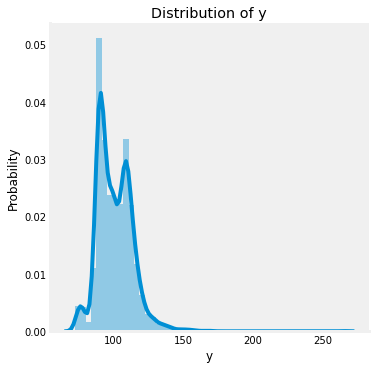

In [ ]:
sns.FacetGrid(train_df,size=5) \
   .map(sns.distplot,'y') \
   .add_legend()
plt.ylabel('Probability')
plt.title("Distribution of y")
plt.grid()
plt.show()

Text(0, 0.5, 'y')

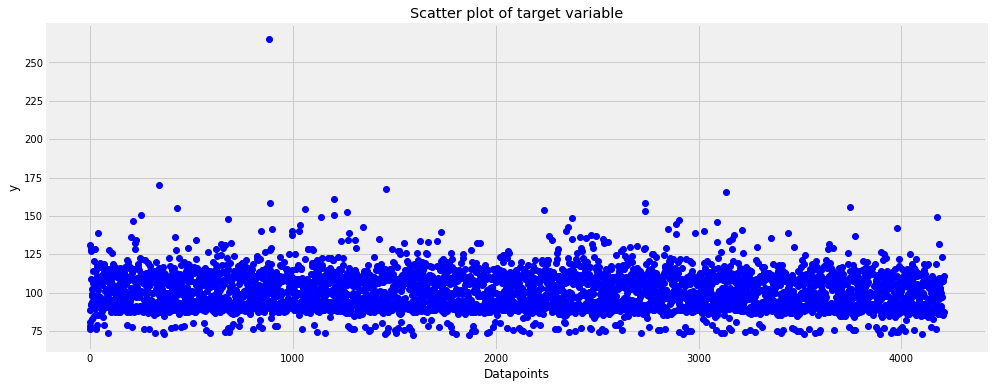

In [ ]:
#https://www.kaggle.com/aditya1702/mercedes-benz-data-exploration
#scatter plot
x= range(train_df.shape[0])
y= train_df["y"].values
plt.figure(figsize=(15,6))
plt.plot(x, y, 'o', color='blue')
plt.title("Scatter plot of target variable")
plt.xlabel("Datapoints")
plt.ylabel("y")

From the scatter plot above, it can be observed that there is one extreme outlier whose y value is 265 approx. This has to be removed.

Also datapoints having y>150 can be considered as outliers and hence should be removed.

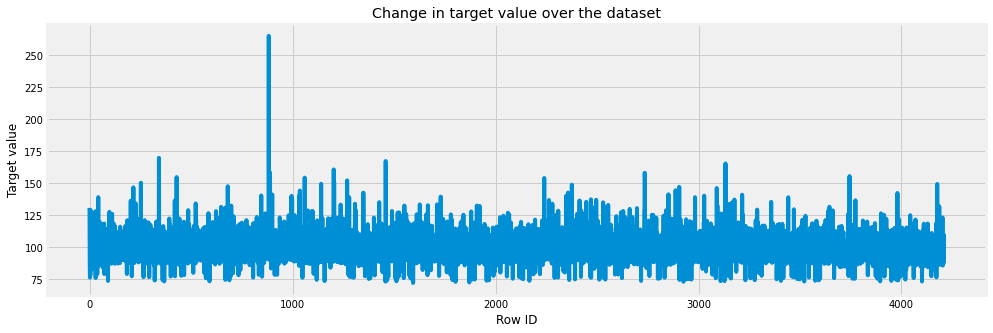

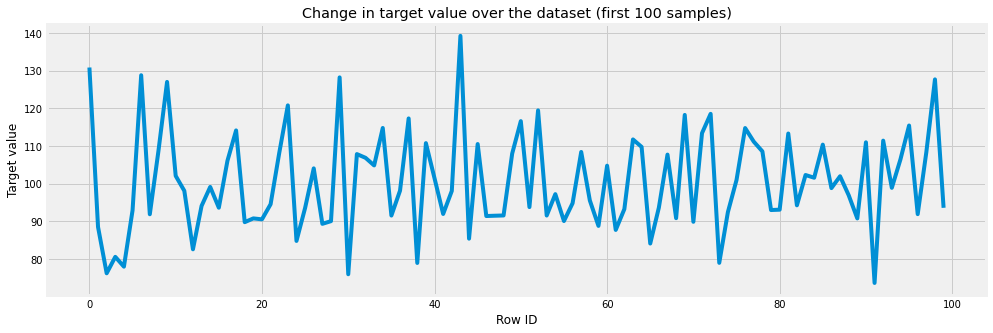

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_train[:100])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 100 samples)')
print()

In [ ]:
train_1= train_df[train_df["y"]<150]
train_1.shape

(4194, 378)

In [ ]:
print("Number of outliers removed from the original dataset:",(train_df.shape[0]-train_1.shape[0]))

Number of outliers removed from the original dataset: 15


## **Univariate Analysis of ID**

In [ ]:
#calculating PCC between ID & y
#ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
#https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Correlation_Matrix.pdf
from scipy.stats import pearsonr
x= train_1.ID.values
y= train_1.y.values
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.049


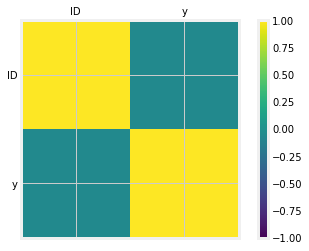

In [ ]:
df_id= train_1[["ID","y"]]
correlations = df_id.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_id.columns)
ax.set_yticklabels(df_id.columns)
plt.show()

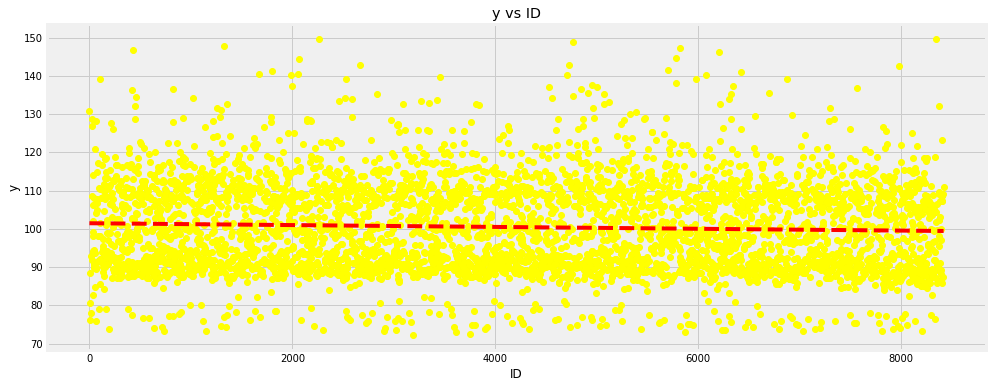

In [ ]:
#scatter plot with trend line
#ref: https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626
x= train_1.ID.values
y= train_1["y"].values
plt.figure(figsize=(15,6))
plt.plot(x, y, 'o', color='yellow')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y vs ID")
plt.xlabel("ID")
plt.ylabel("y")
plt.show()

With a PCC of -0.049 and a decreasing trend observed from the scatter plot, it can be concluded that y is negatively correlated to ID which also gives an intuition that the cars tested later took less time

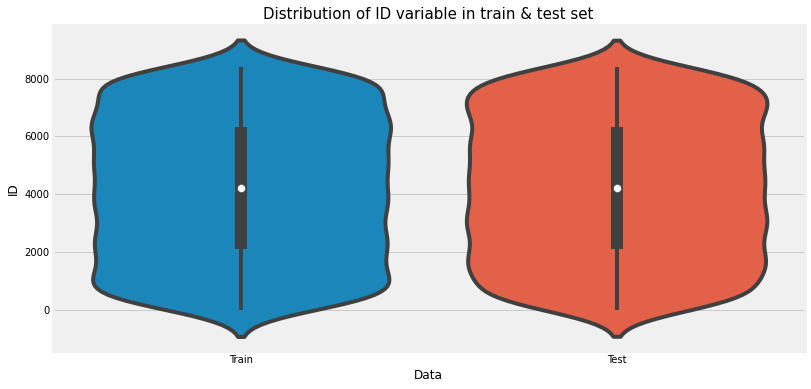

In [ ]:
train_vio=train_1
test_vio=test_df
train_vio['type'] = "Train"
test_vio['type'] = "Test"
combined = pd.concat([train_vio[["ID",'type']], test_vio[["ID",'type']]], axis=0)
plt.figure(figsize=(12,6))
sns.violinplot(x='type', y='ID', data=combined)
plt.xlabel("Data", fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.title("Distribution of ID variable in train & test set", fontsize=15)
plt.show()

The ID values of both train & test data roughly have a similar distribution.

## **Univariate Analysis of categorical variables**

In [ ]:
#https://www.kaggle.com/wangsijia/a-complete-eda-with-a-terrible-baseline
#unique values in each of the 8 categorical columns:
columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in columns:
    unique= train_df[col].unique()
    print("Unique values in feature {} are:{}\n{}\n".format(col,len(unique),unique))

Unique values in feature X0 are:47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

Unique values in feature X1 are:27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

Unique values in feature X2 are:44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']

Unique values in feature X3 are:7
['a' 'e' 'c' 'f' 'd' 'b' 'g']

Unique values in feature X4 are:4
['d' 'b' 'c' 'a']

Unique values in feature X5 are:29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

Unique values in feature X6 are:12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'

In [ ]:
#lets check the unique values of categorical features for test data
#unique values in each of the 8 categorical columns:
for col in columns:
    unique= test_df[col].unique()
    print("Unique values in feature {} are:{}\n{}\n".format(col,len(unique),unique))

Unique values in feature X0 are:49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']

Unique values in feature X1 are:27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']

Unique values in feature X2 are:45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']

Unique values in feature X3 are:7
['f' 'a' 'c' 'e' 'd' 'g' 'b']

Unique values in feature X4 are:4
['d' 'b' 'a' 'c']

Unique values in feature X5 are:32
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

Unique values in feature X6 are:12
['a' 'g' 'j' 'l' 'i

## **Unique categories for X0,X2 & X5 are different in train & test and other columns are identical in count & values**

In [ ]:
# Learning how different in terms of categories are columns 'X0','X2'&'X5' in train & test

diff= ['X0','X2','X5']

for col in diff:
    a= set(sorted(list(train_df[col].unique())))
    b= set(sorted(list(test_df[col].unique())))
    print("Categories of {} present in train but absent in test:{}".format(col,a-b))
    print("Categories of {} present in test but absent in train:{}\n".format(col,b-a))

Categories of X0 present in train but absent in test:{'ac', 'aa', 'ab', 'q'}
Categories of X0 present in test but absent in train:{'av', 'p', 'bb', 'an', 'ag', 'ae'}

Categories of X2 present in train but absent in test:{'ar', 'aa', 'c', 'o', 'l'}
Categories of X2 present in test but absent in train:{'u', 'ad', 'aj', 'w', 'ab', 'ax'}

Categories of X5 present in train but absent in test:{'u'}
Categories of X5 present in test but absent in train:{'b', 'z', 't', 'a'}



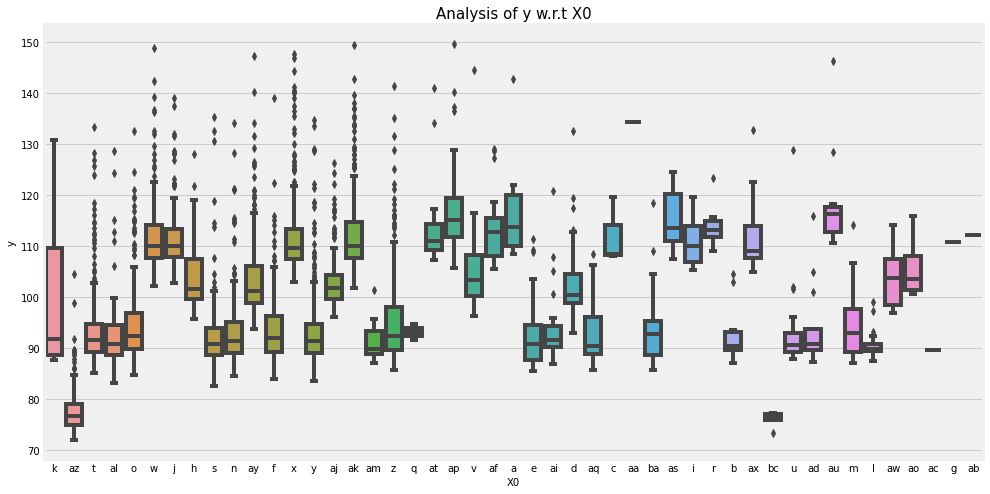

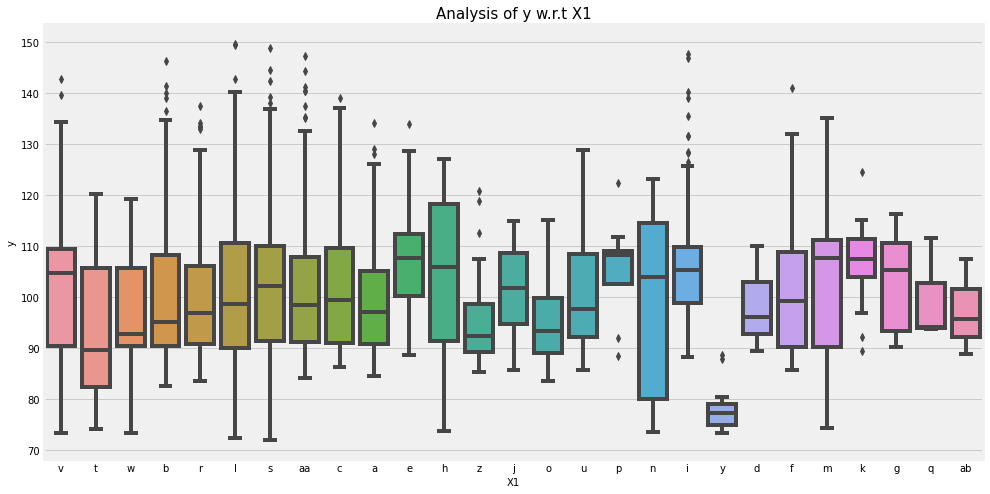

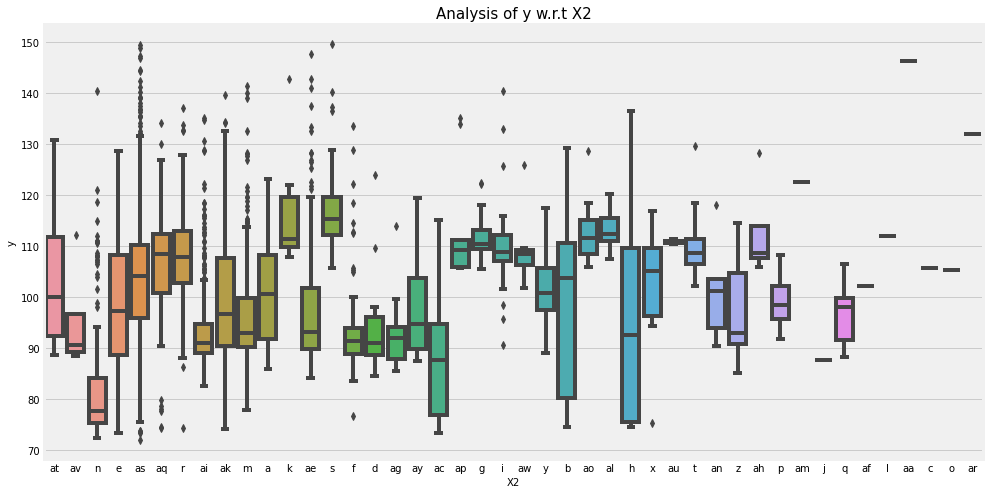

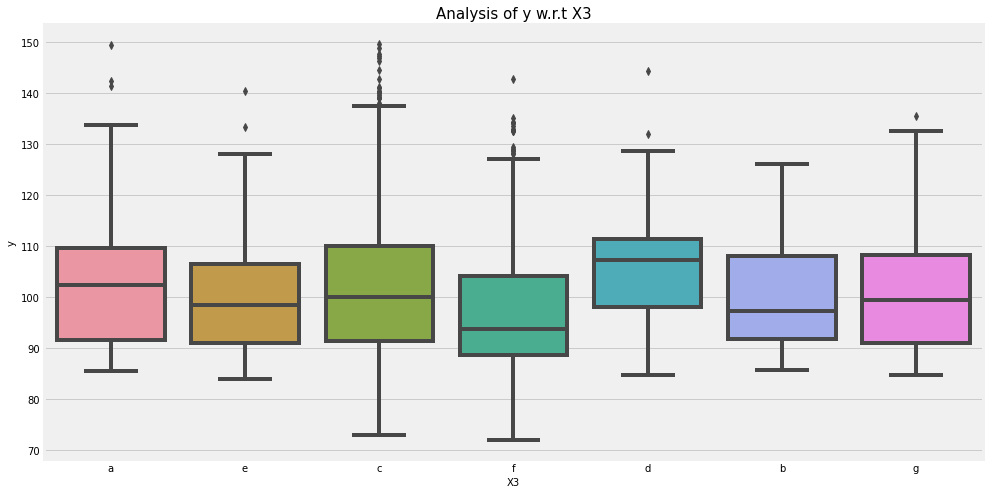

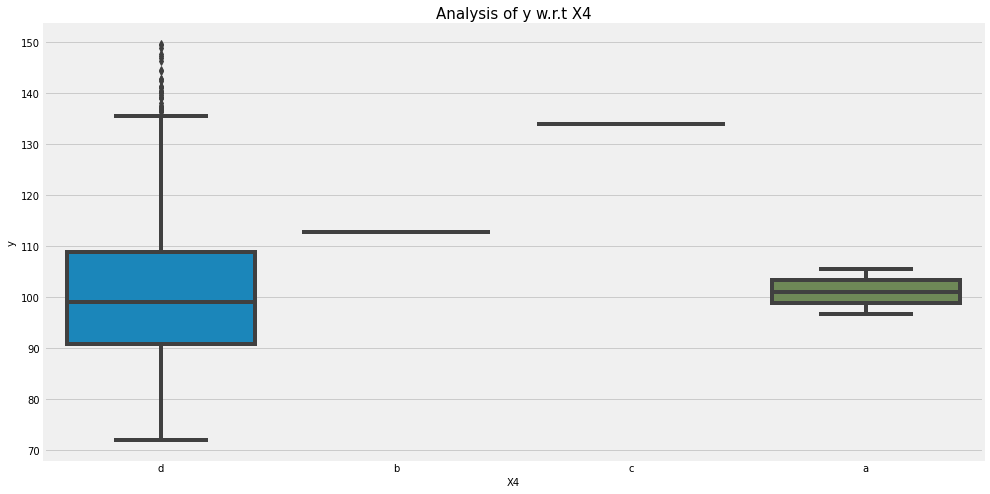

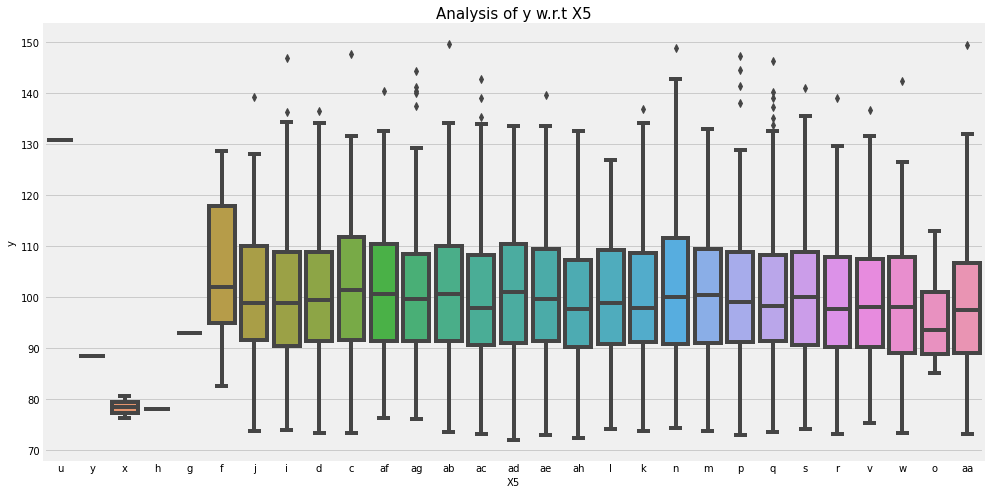

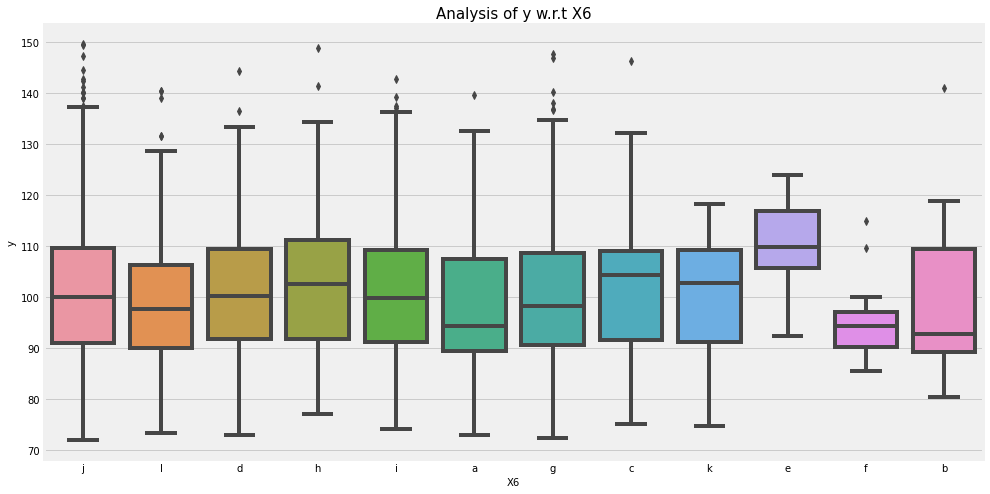

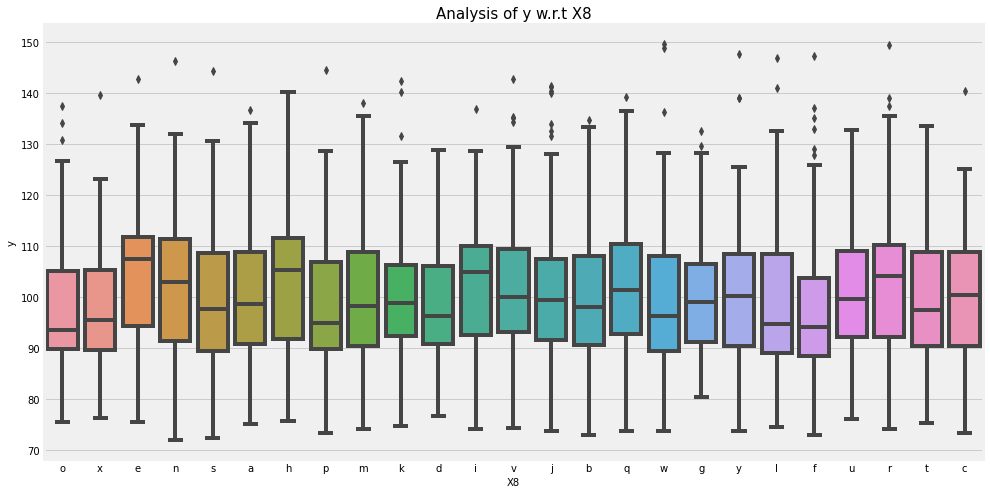

In [ ]:
#box-plots
columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in columns:
    plt.figure(figsize=(15,8))
    sns.boxplot(x=col, y='y', data=train_1)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("y",fontsize=10)
    plt.title('Analysis of y w.r.t '+col,fontsize=15)
    plt.show()

<Figure size 1080x576 with 0 Axes>

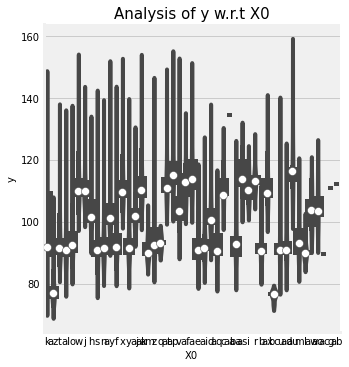

<Figure size 1080x576 with 0 Axes>

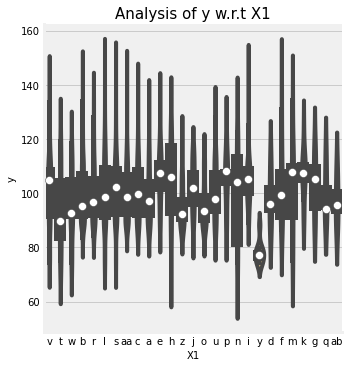

<Figure size 1080x576 with 0 Axes>

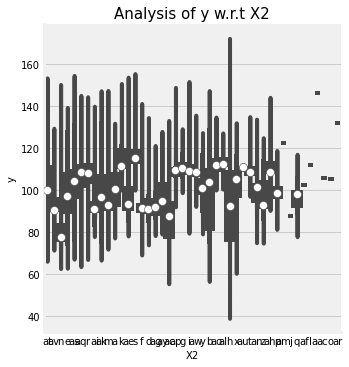

<Figure size 1080x576 with 0 Axes>

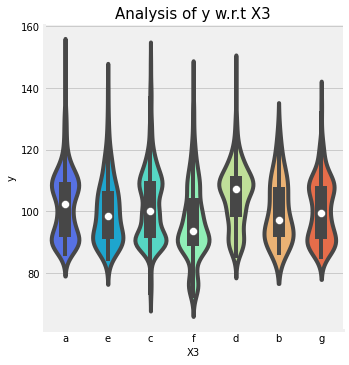

<Figure size 1080x576 with 0 Axes>

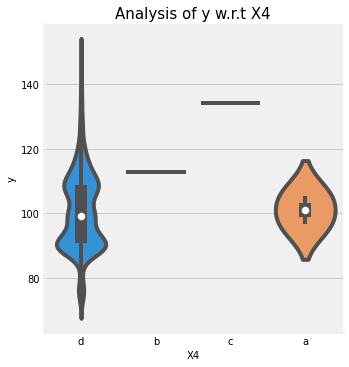

<Figure size 1080x576 with 0 Axes>

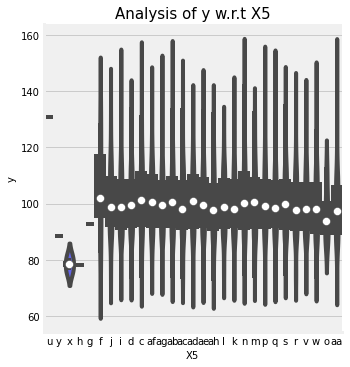

<Figure size 1080x576 with 0 Axes>

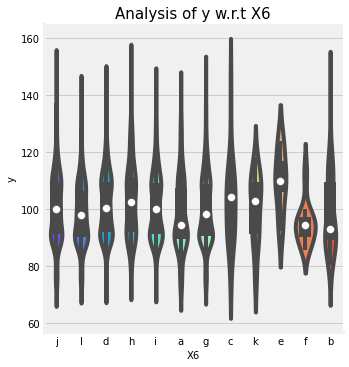

<Figure size 1080x576 with 0 Axes>

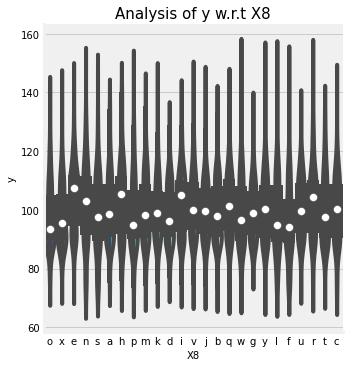

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9
import seaborn as sns
#box-plots
columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in columns:
    plt.figure(figsize=(15,8))
    sns.catplot(x=col, y='y',kind='violin', data=train_1,palette = "rainbow")
    plt.xlabel(col,fontsize=10)
    plt.ylabel("y",fontsize=10)
    plt.title('Analysis of y w.r.t '+col,fontsize=15)
    plt.show()

The plots are convoluted to observe but are self explanatory. However I will highlight few key aspects in each feature as briefly as possible:

In X0, the least median time can be found for category az and the highest can be found for au. Intuitively, az is a sub-part/sub-assembly of the main assembly X0 which was tested quickly(on an average) compared to au. Note: This intuition applies to other features as well.

In X1,the least median time can be found for category y and the highest can be found for p.

In X2,the least median time can be found for category n and the highest can be found for s.

In X3,the least median time can be found for category f and the highest can be found for d.

In X4,the least median time can be found for category d and the highest can be found for c.

In X5,the least median time can be found for category x and the highest can be found for f.

In X6,the least median time can be found for category f and the highest can be found for e.

In X8,the least median time can be found for category o and the highest can be found for e.

## **Univariate Analysis of integer/binary columns**
### ** Unique values in each of the columns**

From the looks of it all the integer columns are binary i.e contains 0 or 1. Anyways lets check it out

In [ ]:
non_int=['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] #non-integer columns
unique_val= dict() #dictionary to store unique values for all the columns

for col in train_df.columns:
    if col not in non_int:
        unique_val[col]=str(list(sorted(train_df[col].unique())))

In [ ]:
u= set(unique_val.values())
u

{'[0, 1]', '[0]'}

For the sake of interpretability & readability I shall group columns/features according to their unique values

In [ ]:
# Grouping dictionary keys by value
#ref: https://www.geeksforgeeks.org/python-grouping-dictionary-keys-by-value/

from collections import defaultdict
res = defaultdict(list) 
for key, val in unique_val.items(): 
    res[val].append(key)

In [ ]:
for key,val in res.items():
    print("Features with {} as unique values are:\n{}".format(key,val))

Features with [0, 1] as unique values are:
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X

Observation

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'] are the features with 0 as unique values and the variance for these features would be 0 and hence keeping them would be useless for the model. Therefore it is better to eliminate it.

Also in the following cells, I will be eliminating features whose variance is less than 0.01 which is an experimental threshold that I would be using.

### **So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity**

## **Univariate Analysis of integer/binary columns**

In [ ]:
#creating lists with 0's count and 1's count
zero_count= []
one_count= []
columns= res['[0, 1]']
for col in columns:
    zero_count.append((train_df[col]==0).sum())
    one_count.append((train_df[col]==1).sum())

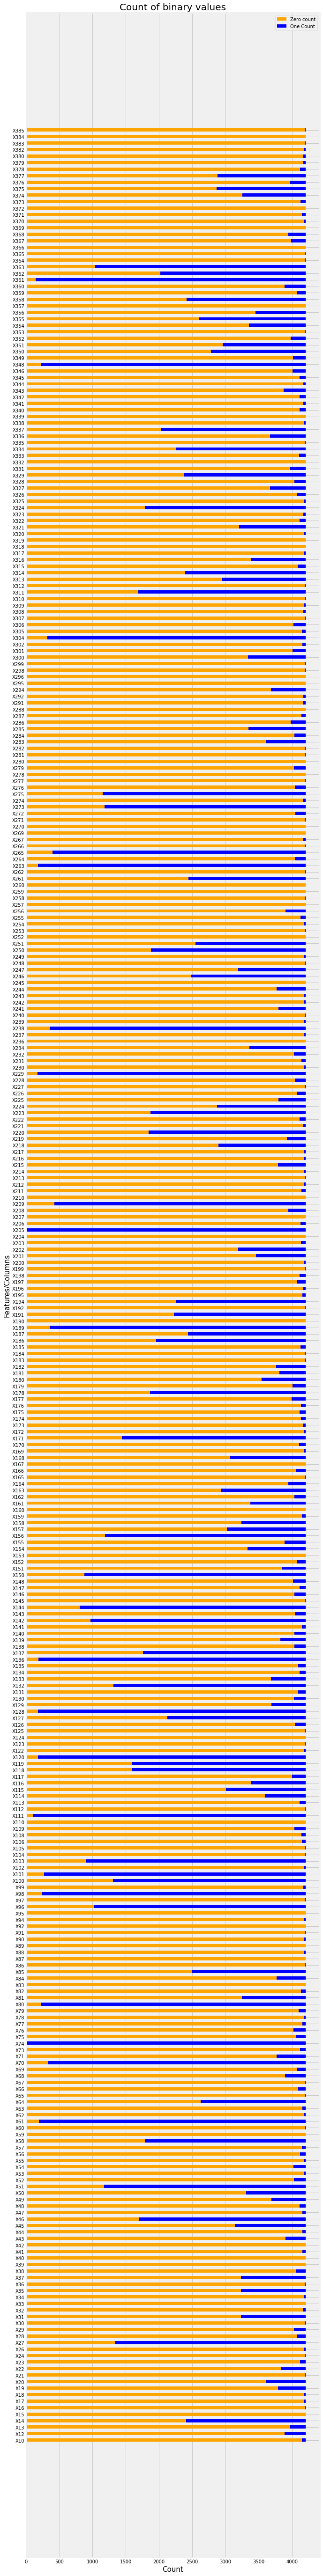

In [ ]:
# Plotting stacked bar graph: Ref-https://stackoverflow.com/questions/16653815/horizontal-stacked-bar-chart-in-matplotlib

N = len(columns) #number of columns
ind = np.arange(N)  #indices required while plotting along y axis
width = 0.50

plt.figure(figsize=(10,100))
p1 = plt.barh(ind, zero_count, width, color='orange')
p2 = plt.barh(ind, one_count, width, left=zero_count, color="blue")
plt.yticks(ind, columns)
plt.legend(('Zero count', 'One Count'))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Features/Columns",fontsize=15)
plt.title('Count of binary values',fontsize=20)
plt.show()

Observations:

It can be observed from the above plot that most of the integer features/columns have zeroes which occur more prominently than ones which means that a particular feature represented by 0 is tested consistently.

after obsering both dataset values 

https://towardsdatascience.com/exploratory-data-analysis-feature-engineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298

We also try to remove outliers

Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.

Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).

# 1.2 **Data cleaning** 

In [ ]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(4209, 378)

## **Removing features having unique values as only 0**

In [ ]:

train_bin= train_df.copy()
#As discussed in 3.7.1 observation
train_bin= train_bin.drop(['y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 
                       'X289', 'X290','X293', 'X297', 'X330', 'X339', 'X347'], axis=1)
train_bin.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

train_df.shape

(4209, 378)

In [ ]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,type
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Test
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Test
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Test
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Test
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Test


In [ ]:
test_bin= test_df.copy()
test_bin= test_bin.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 
                       'X289', 'X290','X293', 'X297', 'X330', 'X339', 'X347','type'], axis=1)
test_bin.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## **Removing features whose variance is <0.01 (Threshold)**

In [ ]:
low_var_cols=[]
for i in test_bin.columns:
    if test_bin[i].var()<0.01: #Threshold value is experimental
        low_var_cols.append(i)

print("Number of columns having very less variance are:\n",len(low_var_cols))
print("Columns are:\n",low_var_cols)

Number of columns having very less variance are:
 133
Columns are:
 ['X15', 'X16', 'X17', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X44', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X183', 'X184', 'X190', 'X192', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X269', 'X270', 'X271', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X292', 'X295', 'X296', 'X298', 'X299', 'X302', 'X305', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320', 'X323', 'X325', 'X332', 'X335', 'X338', 'X341', 'X344', 'X353'

In [ ]:
#dropping the above columns

train_bin = train_bin.drop(low_var_cols,axis=1)
test_bin = test_bin.drop(low_var_cols,axis=1)
print(train_bin.shape)
print(test_bin.shape)

(4209, 223)
(4209, 223)


In [ ]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X35,X37,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X54,X56,X57,X58,X61,X63,X64,X66,X68,X69,X70,X71,...,X322,X324,X326,X327,X328,X329,X331,X333,X334,X336,X337,X340,X342,X343,X345,X346,X348,X349,X350,X351,X352,X354,X355,X356,X358,X359,X360,X361,X362,X363,X367,X368,X371,X373,X374,X375,X376,X377,X378,X379
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


## **Checking for Highly corelated features**

In [ ]:
#checking for very highly correlated features i.e. around 1
temp= train_bin.copy()
temp= temp.drop('ID',axis=1)
ext_corr=[]
cols = list(temp.columns.values)
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        val=temp[cols[i]].corr(temp[cols[j]])
        if val>=0.99:
            ext_corr.append((cols[i],cols[j]))
print(len(ext_corr))
#print(ext_corr[:-1])

42


In [ ]:
print(ext_corr[-5:])

[('X155', 'X360'), ('X202', 'X247'), ('X208', 'X368'), ('X226', 'X326'), ('X232', 'X279')]


These highly correlated features can be somewhat considered as duplicates.

### **Remove numerical features which are duplicate**

In [ ]:
#ref: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    pairs=[]
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                #pairs.append((df.columns.values[x],df.columns.values[y]))
 
    return list(duplicateColumnNames)

In [ ]:
train_duplicates= getDuplicateColumns(train_bin)
print("Number of duplicates in train data =",len(train_duplicates))
print("Duplicate columns are:")
print(train_duplicates)

Number of duplicates in train data = 18
Duplicate columns are:
['X119', 'X222', 'X247', 'X134', 'X146', 'X147', 'X35', 'X37', 'X84', 'X226', 'X326', 'X76', 'X232', 'X279', 'X360', 'X244', 'X324', 'X113']


## **Checking for high correlations among duplicate columns**

In [ ]:
#checking for very highly correlated features i.e. around 1
temp= train_bin.copy()
temp= temp.drop('ID',axis=1)
corr_values=[]
high_corr=[]
cols = train_duplicates
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        val=temp[cols[i]].corr(temp[cols[j]])
        if val>=0.90:
            corr_values.append(val)
            high_corr.append((cols[i],cols[j]))
print("Number of correlated pairs:",len(high_corr))
print("\n")
print("Correlation values:\n",corr_values)
print("\n")
print("Feature pairs:\n",high_corr)

Number of correlated pairs: 12


Correlation values:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9942735742325085, 0.9942735742325085, 1.0]


Feature pairs:
 [('X222', 'X134'), ('X222', 'X147'), ('X222', 'X113'), ('X134', 'X147'), ('X134', 'X113'), ('X147', 'X113'), ('X35', 'X37'), ('X84', 'X244'), ('X226', 'X326'), ('X76', 'X232'), ('X76', 'X279'), ('X232', 'X279')]


In [ ]:
# Comparing pairs and removing distinct features manually

to_drop=['X279','X76','X37','X134','X147','X222','X244','X326']
train_bin= train_bin.drop(to_drop,axis=1)
test_bin= test_bin.drop(to_drop,axis=1)
print(train_bin.shape)
print(test_bin.shape)

(4209, 215)
(4209, 215)


## **Feature Engineering & data preparation**

5.1 Feature Engineering
Feature engineering in the form of 2 way and 3 way interactions of the variables/features could result in better model performance. I will be trying out the following 2 way & 3 way interations: (X314, X315), (X118, X119), (X47, X48),(X10, X54) and (X10, X29) as 2 way interactions & (X118, X314, X315) as 3 way interaction. Reference: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700

### **Before adding the above features let us check correlation between them & the target variable**

In [ ]:
#calculating PCC between ID & y
#ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
from scipy.stats import pearsonr
x= train_df.y.values
y1= train_bin["X314"]+train_bin["X315"].values
y2= train_bin["X118"]+train_bin["X119"].values
y3= train_bin["X47"]+train_bin["X48"].values
y4= train_bin["X118"]+train_bin["X314"]+train_bin["X315"].values
y5= train_bin["X10"]+train_bin["X54"].values
y6= train_bin["X10"]+train_bin["X29"].values
corr1, _ = pearsonr(x, y1)
corr2, _ = pearsonr(x, y2)
corr3, _ = pearsonr(x, y3)
corr4, _ = pearsonr(x, y4)
corr5, _ = pearsonr(x, y5)
corr6, _ = pearsonr(x, y6)
print('Pearsons correlation for (X314, X315) with y: %.3f' % corr1)
print('Pearsons correlation for (X118, X119) with y: %.3f' % corr2)
print('Pearsons correlation for (X47, X48) with y: %.3f' % corr3)
print('Pearsons correlation for (X118, X314, X315) with y: %.3f' % corr4)
print('Pearsons correlation for (X10, X54) with y: %.3f' % corr5)
print('Pearsons correlation for (X10, X29) with y: %.3f' % corr6)

Pearsons correlation for (X314, X315) with y: 0.666
Pearsons correlation for (X118, X119) with y: 0.273
Pearsons correlation for (X47, X48) with y: 0.226
Pearsons correlation for (X118, X314, X315) with y: 0.648
Pearsons correlation for (X10, X54) with y: -0.338
Pearsons correlation for (X10, X29) with y: -0.348


(X314, X315) & (X118, X314, X315) seems to be very important. Anyways lets confirm this by training a XGBoost model.
Also among 2 way interaction features, I will be considering (X10, X54) & (X10, X29) because their magnitudes are greater than correlation scores for feature combinations (X118, X119) & (X47, X48).

In [ ]:
#adding newly engineered features to the train dataframe

train_bin["X314_X315"]= train_bin["X314"]+train_bin["X315"]
train_bin["X10_X54"]= train_bin["X10"]+train_bin["X54"]
train_bin["X10_X29"]= train_bin["X10"]+train_bin["X29"]
train_bin["X118_X314_X315"]= train_bin["X118"]+train_bin["X314"]+train_bin["X315"]

In [ ]:
train_bin.shape

(4209, 219)

In [ ]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X35,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X54,X56,X57,X58,X61,X63,X64,X66,X68,X69,X70,X71,X73,...,X328,X329,X331,X333,X334,X336,X337,X340,X342,X343,X345,X346,X348,X349,X350,X351,X352,X354,X355,X356,X358,X359,X360,X361,X362,X363,X367,X368,X371,X373,X374,X375,X376,X377,X378,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


### **Removing highly correlated(+ve & -ve) features**

In [ ]:
X_corr= train_bin.copy()
X_corr= train_bin.drop(['X314_X315','X10_X54','X10_X29','X118_X314_X315'], axis=1)
X_corr.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X35,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X54,X56,X57,X58,X61,X63,X64,X66,X68,X69,X70,X71,X73,...,X321,X322,X324,X327,X328,X329,X331,X333,X334,X336,X337,X340,X342,X343,X345,X346,X348,X349,X350,X351,X352,X354,X355,X356,X358,X359,X360,X361,X362,X363,X367,X368,X371,X373,X374,X375,X376,X377,X378,X379
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
corr_values=[] #list to store the correlated values of feature pairs
features=[] #list of correlated feature pairs 

for i in range(0,len(X_corr.columns)-1):
    for j in range(i+1,len(X_corr.columns)):
        temp_corr=X_corr[X_corr.columns[i]].corr(X_corr[X_corr.columns[j]])
        if temp_corr>=0.95 or temp_corr<=-0.95: # 95% is the threshold value
            features.append((X_corr.columns[i],X_corr.columns[j]))
            corr_values.append(temp_corr)
print("Number of pairs of extremely correlated features:\n",len(corr_values))
print("Correlation values are:\n{}\n".format(corr_values))
print("Pairs of features are:",features)

Number of pairs of extremely correlated features:
 63
Correlation values are:
[0.9946905193295096, 0.9942735742325085, -0.9942735742325085, 0.9619026367316289, 1.0, -1.0, 0.9648462500309446, 0.9999999999999999, 1.0, 0.9840557263098036, 0.9977899864059676, -0.9559727478656125, -0.9999999999999999, -1.0, 0.9681578901565968, 0.9942735742325085, -0.9942735742325085, 0.9593211296031018, 0.9859717098380162, 1.0, 0.9559727478656126, -0.9633335850764944, 1.0, 0.992884953686842, 0.988474898517225, 0.9835016224795972, 0.9840557263098036, 1.0, 0.9512650578143027, 0.9512650578143027, 0.9937118932220291, -1.0, -0.9681578901565968, -0.9942735742325085, 0.9942735742325085, -0.9593211296031018, 0.9859717098380161, 0.9939228736505441, 1.0, 0.9939228736505442, -1.0, 0.9999999999999999, 1.0, -1.0, 0.9619026367316288, -0.9619026367316288, 0.954194865963013, 0.984167835533187, 0.9519910977417329, -1.0, 0.9690260940383703, -0.9690260940383703, 1.0, 0.9939506696880038, -0.9875348832737527, -1.0, 0.9648462500

In the pairs of features above lot of features are repeated and hence it is kinda tricky to remove these manually

In order to simplify this operation I created an array booler having only 0's & 1's and it helps in keeping a track of the features that needs to be dropped

In [ ]:

booler = np.ones(400) #array to keep a track of the features that needs to be dropped
corr_cols=[] #list storing the features to be dropped
for i in features:
    if booler[int(i[1][1:])]==1: #this expression will check for the 2nd term in the tuple
        booler[int(i[1][1:])]=0
        corr_cols.append(i[1])
    elif booler[int(i[0][1:])]==1: #this expression will check for the 1st term in the tuple in case the value in booler is already zero
        booler[int(i[0][1:])]=0
        corr_cols.append(i[0])

In [ ]:
print("Finally, number of columns to be removed:",len(corr_cols))
print("Columns are:\n",corr_cols)

Finally, number of columns to be removed: 42
Columns are:
 ['X215', 'X54', 'X136', 'X162', 'X232', 'X263', 'X328', 'X35', 'X113', 'X198', 'X129', 'X61', 'X120', 'X137', 'X324', 'X111', 'X84', 'X348', 'X363', 'X371', 'X119', 'X311', 'X264', 'X130', 'X140', 'X146', 'X158', 'X226', 'X360', 'X157', 'X250', 'X378', 'X194', 'X362', 'X247', 'X368', 'X229', 'X358', 'X314', 'X352', 'X367', 'X337']


In [ ]:
#dropping the correlated columns from train
train_bin = train_bin.drop(corr_cols,axis=1)
print(train_bin.shape)

(4209, 177)


In [ ]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X291,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


So finally after all these variance & correlation checks, I managed to reduce the number of features(integer/binary) from 368 to 176 (engineered features & ID excluded) 

### **Updating the test dataframe**

In [ ]:
test_bin["X314_X315"]= test_bin["X314"]+test_bin["X315"]
test_bin["X10_X54"]= test_bin["X10"]+test_bin["X54"]
test_bin["X10_X29"]= test_bin["X10"]+test_bin["X29"]
test_bin["X118_X314_X315"]= test_bin["X118"]+test_bin["X314"]+test_bin["X315"]

In [ ]:
#dropping the correlated columns from test
test_bin = test_bin.drop(corr_cols,axis=1)
print(test_bin.shape)

(4209, 177)


In [ ]:
test_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X291,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,2,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,3,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,4,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2



So finally after all these variance & correlation checks, I managed to reduce the number of features(integer/binary) from 368 to 176 (engineered features & ID excluded) which is about 47.8% reduction.

In [ ]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Preparing final data¶**

In [ ]:

#preparing final data matrix by adding categorical features to the above dataframe

X1= train_bin.copy() #final train data with target variable
cat=['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8','y']
for i in cat:
    X1[i]= train_df[i].values
print(X1.shape)
X1.head()

(4209, 186)


,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8,y
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,k,v,at,a,d,u,j,o,130.81
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,k,t,av,e,d,y,l,o,88.53
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,w,n,c,d,x,j,x,76.26
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,t,n,f,d,x,l,e,80.62
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,n,f,d,h,d,n,78.02


In [ ]:
X2= test_bin.copy()
cat=['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'] 
for i in cat:
    X2[i]= test_df[i].values
print(X2.shape)
X2.head()

(4209, 185)


,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,n,f,d,t,a,w
1,2,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,t,b,ai,a,d,b,g,y
2,3,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,as,f,d,a,j,j
3,4,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,l,n,f,d,z,l,n
4,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2,w,s,as,c,d,y,i,m


In [ ]:
#saving final train & test data
X1.to_csv("final_train_data.csv")
X2.to_csv("final_test_data.csv")

## **Splitting the train data into train & CV**

In [ ]:
train= pd.read_csv("final_train_data.csv", index_col=0)
test= pd.read_csv("final_test_data.csv", index_col=0)

In [ ]:
train.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8,y
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,k,v,at,a,d,u,j,o,130.81
1,6,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,k,t,av,e,d,y,l,o,88.53
2,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,w,n,c,d,x,j,x,76.26
3,9,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,t,n,f,d,x,l,e,80.62
4,13,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,n,f,d,h,d,n,78.02


In [ ]:

test.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,n,f,d,t,a,w
1,2,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,t,b,ai,a,d,b,g,y
2,3,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,v,as,f,d,a,j,j
3,4,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,az,l,n,f,d,z,l,n
4,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2,w,s,as,c,d,y,i,m


In [ ]:
#preparing data to split
y = train['y']
X = train.drop(['y'], axis=1)
print(X.shape)
print(test.shape)

(4209, 185)
(4209, 185)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
print("Shape of train data:",X_train.shape)
print("Shape of cv data:",X_cv.shape)

Shape of train data: (3367, 185)
Shape of cv data: (842, 185)


## **Check for feature importance(only integer columns)**

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.

## **XGBoost model**

In [ ]:
#https://www.kaggle.com/gotthem/xgboost-handling-duplicates-outliers
#check if the newly added features are important or not
check_y= y_train
check_x= X_train.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'], axis=1) #dropping all categorical features

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model1 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.01,0.02,0.03,0.05,0.1,0.2],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.8, 0.9],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [100, 200, 300, 500, 800, 1000, 1200]}
rs1 = RandomizedSearchCV(model1, parameters, scoring = 'r2',n_jobs = -1)
rs1.fit(check_x, check_y)

[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.

In [ ]:
rs1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model2 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.7,
 colsample_bytree=0.5,
 gamma=0,
 max_depth=4,
 n_estimators=800,n_jobs = -1)
model2.fit(check_x, check_y)

[15:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

## **Important features**

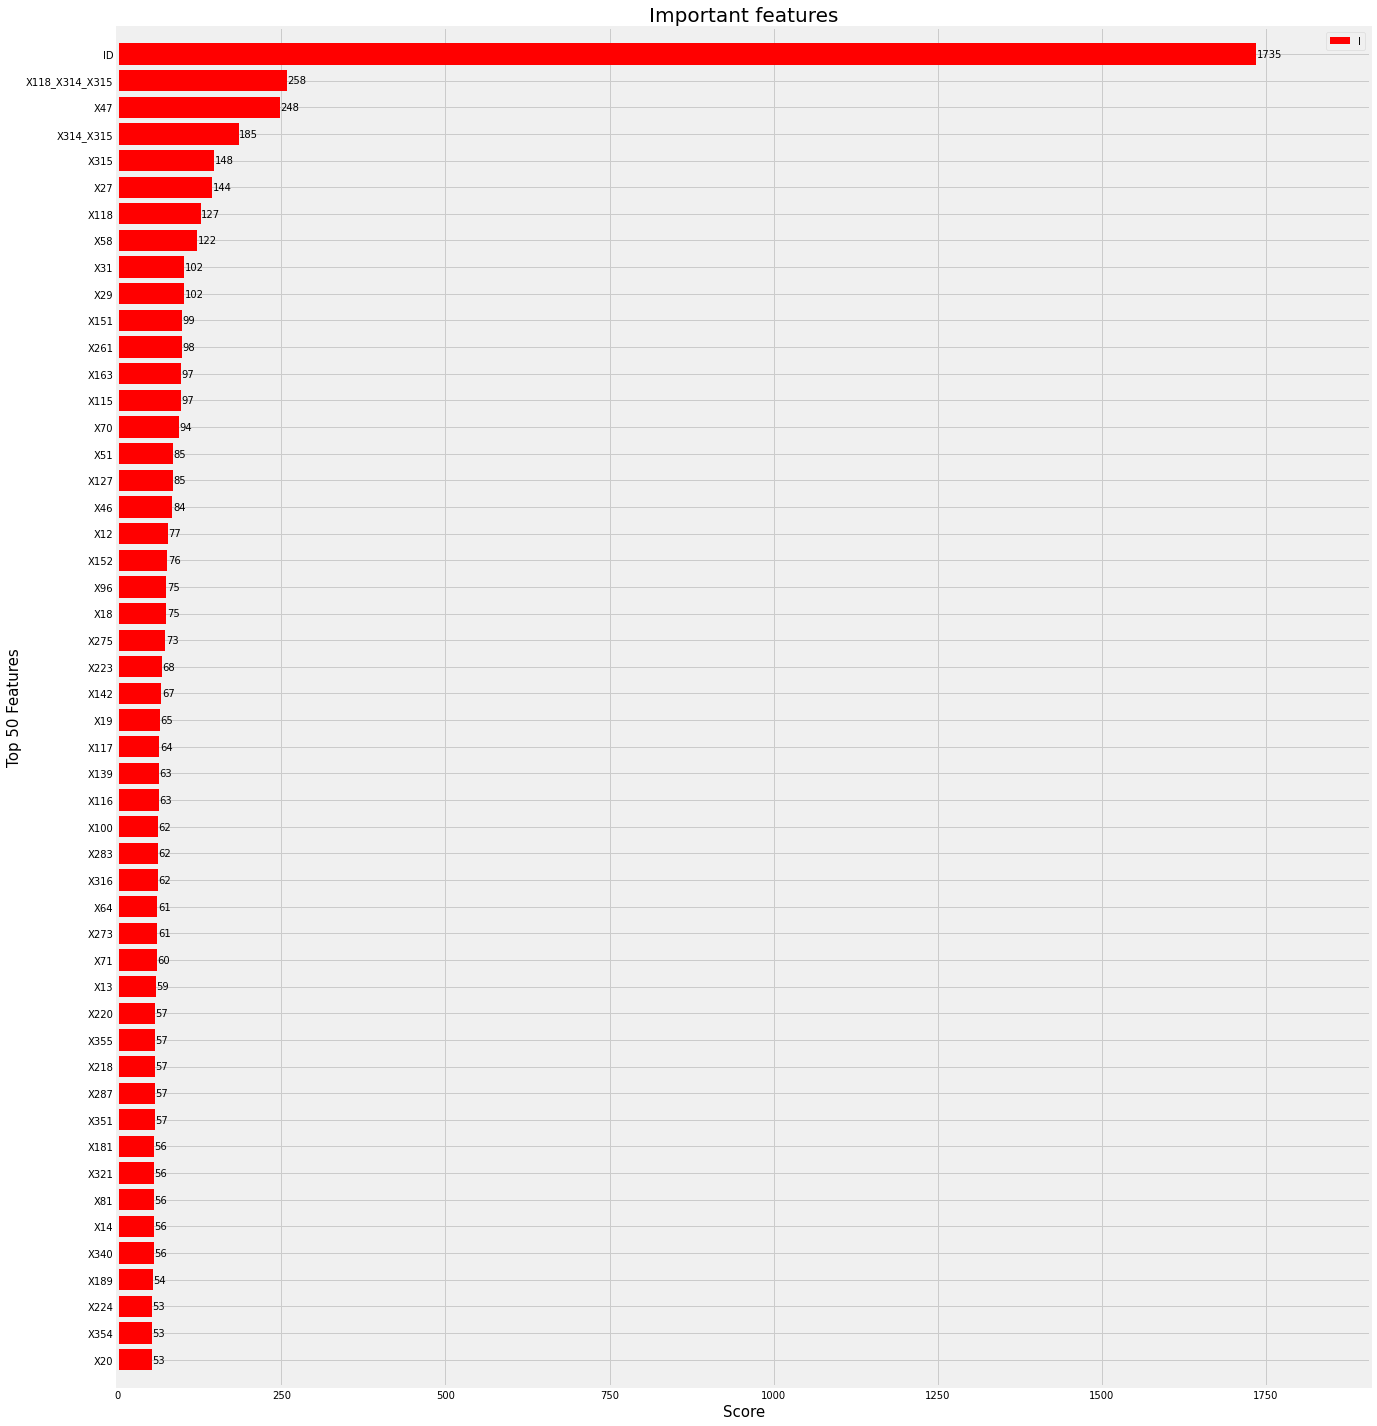

In [ ]:
fig, ax = plt.subplots(figsize=(20,25))
xgb.plot_importance(model2, max_num_features=50, height=0.8, ax=ax, color = 'red')
plt.legend(('Importance score'))
plt.xlabel("Score",fontsize=15)
plt.ylabel("Top 50 Features",fontsize=15)
plt.title('Important features',fontsize=20)
plt.show()

In [ ]:
#feature importances
import operator

# dictionary of feature importance from the XGboost regressor with key as features & values as importance value
imp_dict=model2.get_booster().get_score(importance_type='weight') 

#sorting the dictionary in descending order of values
#ref:https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
sorted_dict = dict( sorted(imp_dict.items(), key=operator.itemgetter(1),reverse=True))

import itertools
# Get first N items in dictionary
#https://www.geeksforgeeks.org/python-get-first-n-keyvalue-pairs-in-given-dictionary/

top_100 = dict(itertools.islice(sorted_dict.items(), 100))
print(top_100)

{'ID': 1735, 'X118_X314_X315': 258, 'X47': 248, 'X314_X315': 185, 'X315': 148, 'X27': 144, 'X118': 127, 'X58': 122, 'X29': 102, 'X31': 102, 'X151': 99, 'X261': 98, 'X115': 97, 'X163': 97, 'X70': 94, 'X127': 85, 'X51': 85, 'X46': 84, 'X12': 77, 'X152': 76, 'X18': 75, 'X96': 75, 'X275': 73, 'X223': 68, 'X142': 67, 'X19': 65, 'X117': 64, 'X116': 63, 'X139': 63, 'X316': 62, 'X283': 62, 'X100': 62, 'X273': 61, 'X64': 61, 'X71': 60, 'X13': 59, 'X351': 57, 'X287': 57, 'X218': 57, 'X355': 57, 'X220': 57, 'X340': 56, 'X14': 56, 'X81': 56, 'X321': 56, 'X181': 56, 'X189': 54, 'X20': 53, 'X354': 53, 'X224': 53, 'X10_X54': 52, 'X156': 52, 'X154': 51, 'X322': 49, 'X173': 46, 'X50': 45, 'X22': 45, 'X132': 44, 'X182': 44, 'X49': 43, 'X225': 43, 'X164': 42, 'X375': 42, 'X342': 40, 'X234': 39, 'X150': 39, 'X186': 39, 'X313': 38, 'X73': 38, 'X168': 38, 'X131': 37, 'X68': 37, 'X56': 36, 'X43': 36, 'X114': 36, 'X109': 36, 'X350': 36, 'X180': 35, 'X374': 35, 'X201': 35, 'X345': 35, 'X329': 35, 'X77': 34, 'X

In [ ]:
len(imp_dict)

176


## **Observations:**

'X118_X314_X315'& 'X314_X315' being in the top 50 important features turned out to be very useful. BAM! Feature engg was a success.

'X10_X29' & 'X10_X54' were not in the top 50, but still I would retain it for modeling

https://github.com/vinay10949/AutomatedFeatureSelection/blob/master/FeatureSelection.ipynb

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:

def one_hot_encoding(column,train,cv,test):
    ''' Function to encode categorical features'''
    
    vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b") #https://datascience.stackexchange.com/questions/29352/sklearn-countvectorizer-token-pattern-skip-token-if-pattern-match
    vectorizer.fit(train[column].values) # fit has to happen only on train data
    train_ohe = vectorizer.transform(train[column].values)
    cv_ohe = vectorizer.transform(cv[column].values)
    test_ohe = vectorizer.transform(test[column].values)
    return train_ohe,cv_ohe,test_ohe,print("Shape of matrix for column {} afer vectorization:".format(column)),print(train_ohe.shape,cv_ohe.shape,test_ohe.shape)

In [ ]:
def score(y_true, y_pred):
    ''' Function to calculate R2 score'''
    
    return r2_score(y_true, y_pred)

In [ ]:
tr_X0_ohe, cv_X0_ohe, ts_X0_ohe,a,b= one_hot_encoding("X0",X_train,X_cv,test)
tr_X1_ohe, cv_X1_ohe, ts_X1_ohe,a,b= one_hot_encoding("X1",X_train,X_cv,test)
tr_X2_ohe, cv_X2_ohe, ts_X2_ohe,a,b= one_hot_encoding("X2",X_train,X_cv,test)
tr_X3_ohe, cv_X3_ohe, ts_X3_ohe,a,b= one_hot_encoding("X3",X_train,X_cv,test)
tr_X4_ohe, cv_X4_ohe, ts_X4_ohe,a,b= one_hot_encoding("X4",X_train,X_cv,test)
tr_X5_ohe, cv_X5_ohe, ts_X5_ohe,a,b= one_hot_encoding("X5",X_train,X_cv,test)
tr_X6_ohe, cv_X6_ohe, ts_X6_ohe,a,b= one_hot_encoding("X6",X_train,X_cv,test)
tr_X8_ohe, cv_X8_ohe, ts_X8_ohe,a,b= one_hot_encoding("X8",X_train,X_cv,test)

Shape of matrix for column X0 afer vectorization:
(3367, 46) (842, 46) (4209, 46)
Shape of matrix for column X1 afer vectorization:
(3367, 27) (842, 27) (4209, 27)
Shape of matrix for column X2 afer vectorization:
(3367, 42) (842, 42) (4209, 42)
Shape of matrix for column X3 afer vectorization:
(3367, 7) (842, 7) (4209, 7)
Shape of matrix for column X4 afer vectorization:
(3367, 4) (842, 4) (4209, 4)
Shape of matrix for column X5 afer vectorization:
(3367, 29) (842, 29) (4209, 29)
Shape of matrix for column X6 afer vectorization:
(3367, 12) (842, 12) (4209, 12)
Shape of matrix for column X8 afer vectorization:
(3367, 25) (842, 25) (4209, 25)


In [ ]:
#Considering the remaining 175 features
tr_rem= X_train.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'],axis=1).values
cv_rem= X_cv.drop(['X0', 'X1', 'X2', 'X3','X4', 'X5', 'X6', 'X8'],axis=1).values
ts_rem= test.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'],axis=1).values
print(tr_rem.shape,cv_rem.shape,ts_rem.shape)

(3367, 177) (842, 177) (4209, 177)


In [ ]:
# 1.1 Combining categorical & integer features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_ohe = hstack((tr_X0_ohe,tr_X1_ohe,tr_X2_ohe,tr_X3_ohe,tr_X4_ohe,tr_X5_ohe,tr_X6_ohe,tr_X8_ohe,tr_rem)).tocsr()

X_cv_ohe = hstack((cv_X0_ohe,cv_X1_ohe,cv_X2_ohe,cv_X3_ohe,cv_X4_ohe,cv_X5_ohe,cv_X6_ohe,cv_X8_ohe,cv_rem)).tocsr()

X_test_ohe = hstack((ts_X0_ohe,ts_X1_ohe,ts_X2_ohe,ts_X3_ohe,ts_X4_ohe,ts_X5_ohe,ts_X6_ohe,ts_X8_ohe,ts_rem)).tocsr()

print("Final Data Matrix")
print(X_tr_ohe.shape, y_train.shape)
print(X_cv_ohe.shape, y_cv.shape)
print(X_test_ohe.shape)

Final Data Matrix
(3367, 369) (3367,)
(842, 369) (842,)
(4209, 369)


# **2.1 Models**
Normalizing data for linear and SVR models

In [ ]:

#Import libraries
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR,SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.utils import resample
from sklearn.externals import joblib

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler() #MinMaxScaler does not operate on sparse matrices
X_tr_norm = scaler.fit_transform(X_tr_ohe)
X_cv_norm = scaler.transform(X_cv_ohe)
X_test_norm = scaler.transform(X_test_ohe)
print(X_tr_norm.shape, y_train.shape)
print(X_cv_norm.shape, y_cv.shape)
print(X_test_norm.shape)

(3367, 369) (3367,)
(842, 369) (842,)
(4209, 369)


## **SVR with hyperparameter tuning**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf= SVR()
parameters = {'C':[1, 10, 100, 1000]} # rbf is the default kernel here
grid2 = GridSearchCV(clf, parameters, scoring='r2', n_jobs=-1)
grid2.fit(X_tr_norm, y_train.values)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid2.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
sv= SVR(C=10)
sv.fit(X_tr_norm, y_train)

y_pred_cv_svr = sv.predict(X_cv_norm)

y_pred_train_svr = sv.predict(X_tr_norm)

train_score_svr=score(y_train, y_pred_train_svr)
cv_score_svr=score(y_cv, y_pred_cv_svr)
print("Train score:",round(train_score_svr,4))
print("Cross validation score:",round(cv_score_svr,4))

Train score: 0.6032
Cross validation score: 0.5531


In [ ]:
y_pred_test_svr = sv.predict(X_test_norm)
y_pred_test_svr

array([ 77.51929463,  91.85099398,  78.53021548, ...,  90.3745951 ,
       107.19459421,  89.13716898])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_svr
submission.to_csv('Predictions_svr_norm_1.csv', index=False)

### **Here I am getting kagge score 0.51675**

In [ ]:
submission.head(10)

,ID,y
0,1,77.519295
1,2,91.850994
2,3,78.530215
3,4,80.183924
4,5,110.550957
5,8,91.182551
6,10,108.825605
7,11,94.177756
8,12,116.101154
9,14,93.150018


## **Linear regression with hyperparameter tuning**

### **L2 regularization**

In [ ]:
alpha = [1e-3,5e-3,0.01,0.05,0.1,0.5,1,5,10,15,20]
train_r2_score2_list=[]
val_r2_score2_list=[]
for i in tqdm(alpha):
    clf_l2= SGDRegressor(loss='squared_loss',penalty='l2',alpha=i,random_state=42)
    clf_l2.fit(X_tr_norm,y_train)
    train_r2_score2_list.append(clf_l2.score(X_tr_norm,y_train))
    val_r2_score2_list.append(clf_l2.score(X_cv_norm,y_cv))

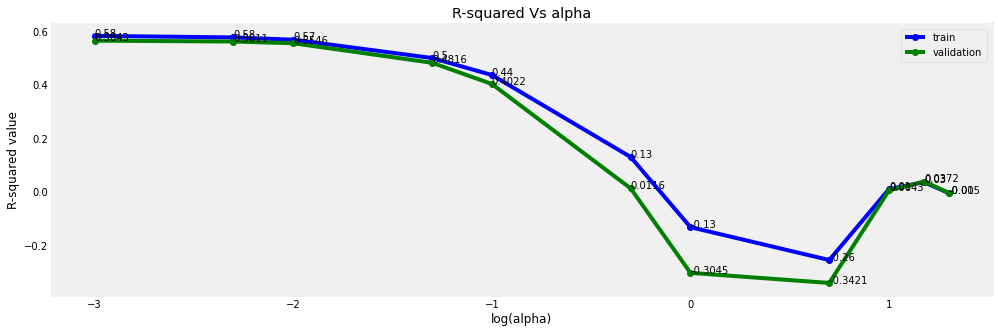

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.log10(alpha),train_r2_score2_list,'bo-',label='train')
ax.plot(np.log10(alpha),val_r2_score2_list,'go-',label='validation')

for i in range(len(alpha)):
    ax.text(np.log10(alpha[i]),train_r2_score2_list[i],s=np.round(train_r2_score2_list[i],2))
    ax.text(np.log10(alpha[i]),val_r2_score2_list[i],s=np.round(val_r2_score2_list[i],4))

plt.xlabel('log(alpha)')
plt.grid()
plt.ylabel('R-squared value')
plt.title('R-squared Vs alpha')
plt.legend()

In [ ]:
best_alpha= np.argmin(val_r2_score2_list[i])

In [ ]:
#Best params
best_params={'penalty':'l2','alpha':best_alpha}

In [ ]:
clf_l2_best = SGDRegressor(loss='squared_loss',penalty=best_params['penalty'],alpha=best_params['alpha'],
                  random_state=42)
clf_l2_best.fit(X_tr_norm,y_train)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
y_pred_cv_l2 = clf_l2_best.predict(X_cv_norm)

y_pred_train_l2 = clf_l2_best.predict(X_tr_norm)

train_score_l2=score(y_train, y_pred_train_l2)
cv_score_l2=score(y_cv, y_pred_cv_l2)
print("Train score:",round(train_score_l2,4))
print("Cross validation score:",round(cv_score_l2,4))

Train score: 0.5835
Cross validation score: 0.5647


In [ ]:
y_pred_test_l2 = clf_l2_best.predict(X_test_norm)
y_pred_test_l2

array([ 80.41995683,  88.45610055,  81.31932251, ...,  90.26502709,
       110.39649518,  92.06846121])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_l2
submission.to_csv('Predictions_LR_sgd_l2.csv', index=False)

Here Iam getting Kaggle score = **0.52977**

In [ ]:
submission.head(10)

,ID,y
0,1,80.419957
1,2,88.456101
2,3,81.319323
3,4,82.324240
4,5,110.731370
5,8,91.168767
6,10,110.062726
7,11,92.506775
8,12,115.185245
9,14,93.571505


### **ELastic Net**

In [ ]:
alpha = [1e-3,5e-3,0.01,0.05,0.1,0.5,1,5,10,15]
l1_ratio = [1e-3,5e-3,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7]
train_r2_score3_list=[]
val_r2_score3_list=[]
for i in tqdm(alpha):
    train_a = []
    val_a = []
    for j in (l1_ratio):
        clf_ele = SGDRegressor(loss='squared_loss',penalty='elasticnet',alpha=i,l1_ratio=j,random_state=42)
        clf_ele.fit(X_tr_norm,y_train)
        train_a.append(clf_ele.score(X_tr_norm,y_train))
        val_a.append(clf_ele.score(X_cv_norm,y_cv))
    train_r2_score3_list.append(train_a)
    val_r2_score3_list.append(val_a)

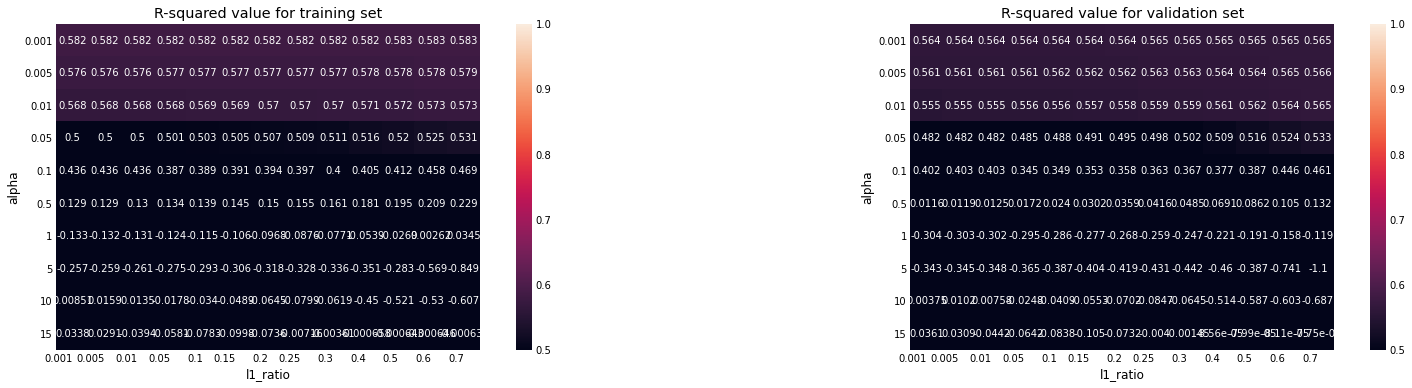

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(121)
ax=sns.heatmap(train_r2_score3_list,annot=True,square=True,fmt='.3g',vmin=0.5,vmax=1)
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.title('R-squared value for training set')
ax.set_xticklabels(l1_ratio,rotation=0, horizontalalignment='right');
ax.set_yticklabels(alpha,rotation=0, horizontalalignment='right');
plt.subplot(122)
ax=sns.heatmap(val_r2_score3_list,annot=True,square=True,fmt='.3g',vmin=0.5,vmax=1)
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.title('R-squared value for validation set')
ax.set_xticklabels(l1_ratio,rotation=0, horizontalalignment='right');
ax.set_yticklabels(alpha,rotation=0, horizontalalignment='right');

In [ ]:
best_alpha_ele = 0.001

In [ ]:
l1_ratio[np.argmax(val_r2_score3_list[3])]


0.7

In [ ]:
#Best params
best_params={'penalty':'elasticnet','alpha':best_alpha_ele,'l1_ratio':0.7}

In [ ]:
clf_ele_best = SGDRegressor(loss='epsilon_insensitive',penalty=best_params['penalty'],alpha=best_params['alpha'],
                   l1_ratio=best_params['l1_ratio'], random_state=42)
clf_ele_best.fit(X_tr_norm,y_train)

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.7,
             learning_rate='invscaling', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='elasticnet',
             power_t=0.25, random_state=42, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_cv_ele = clf_ele_best.predict(X_cv_norm)

y_pred_train_ele = clf_ele_best.predict(X_tr_norm)

train_score_ele=score(y_train, y_pred_train_ele)
cv_score_ele=score(y_cv, y_pred_cv_ele)
print("Train score:",round(train_score_ele,4))
print("Cross validation score:",round(cv_score_ele,4))

Train score: 0.5172
Cross validation score: 0.5284


In [ ]:
#R2 value
print('Train R-squared value:',clf_ele_best.score(X_tr_norm,y_train))
print('Val R-squared value:',clf_ele_best.score(X_cv_norm,y_cv))

Train R-squared value: 0.517192678423894
Val R-squared value: 0.5284467911077528


In [ ]:
y_pred_test_ele = clf_ele_best.predict(X_test_norm)
y_pred_test_ele

array([ 79.25169742,  86.34430148,  78.09586214, ...,  90.23749552,
       107.96023658,  89.80757038])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_ele
submission.to_csv('Predictions_LR_sgd_ele.csv', index=False)

Here I am getting Kaggle Score = **0.48428**


In [ ]:
submission.head(10)

,ID,y
0,1,79.251697
1,2,86.344301
2,3,78.095862
3,4,79.341936
4,5,109.086551
5,8,88.752301
6,10,108.652491
7,11,91.023881
8,12,115.463812
9,14,90.512245


## **SVM regression using SGD regressor**

In [ ]:
#Import libraries
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR,SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.utils import resample
from sklearn.externals import joblib

In [ ]:
alpha = [0.1,0.5,5,10,25,30,35,40,50]
epsilon = [-3,-2-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_r2_score_l1_list=[]
cv_r2_score_l1_list=[]
for i in tqdm(alpha):
    train_a = []
    cv_a = []
    for j in epsilon:
        clf_eps = SGDRegressor(loss='epsilon_insensitive',alpha =i,epsilon=j,random_state=42)
        clf_eps.fit(X_tr_norm,y_train)
        train_a.append(clf_eps.score(X_tr_norm,y_train))
        cv_a.append(clf_eps.score(X_cv_norm,y_cv))
    train_r2_score_l1_list.append(train_a)
    cv_r2_score_l1_list.append(cv_a)

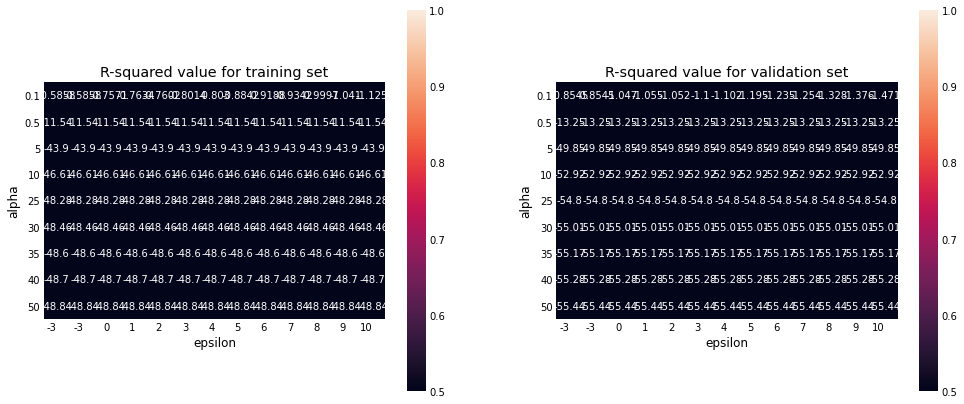

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
ax=sns.heatmap(train_r2_score_l1_list,annot=True,square=True,fmt='.4g',vmin=0.5,vmax=1)
plt.xlabel('epsilon')
plt.ylabel('alpha')
plt.title('R-squared value for training set')
ax.set_xticklabels(epsilon,rotation=0, horizontalalignment='right');
ax.set_yticklabels(alpha,rotation=0, horizontalalignment='right');
plt.subplot(122)
ax=sns.heatmap(cv_r2_score_l1_list,annot=True,square=True,fmt='.4g',vmin=0.5,vmax=1)
plt.xlabel('epsilon')
plt.ylabel('alpha')
plt.title('R-squared value for validation set')
ax.set_xticklabels(epsilon,rotation=0, horizontalalignment='right');
ax.set_yticklabels(alpha,rotation=0, horizontalalignment='right');

In [ ]:
clf_eps_best_alpha = alpha[np.argmax(train_r2_score_l1_list)]
clf_eps_best_alpha

0.1

In [ ]:
epsilon[np.argmax(train_r2_score_l1_list)]


-3

In [ ]:
#Best params
best_params={'penalty':'l1','alpha':clf_eps_best_alpha,'epsilon':-1}

In [ ]:
clf_eps_best = SGDRegressor(loss='epsilon_insensitive',penalty=best_params['penalty'],alpha=best_params['alpha'],
                   epsilon =best_params['epsilon'], random_state=42)
clf_eps_best.fit(X_tr_norm,y_train)


SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=-1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l1', power_t=0.25,
             random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
             verbose=0, warm_start=False)

In [ ]:
y_pred_cv_svr_sgd = clf_eps_best.predict(X_cv_norm)

y_pred_train_svr_sgd = clf_eps_best.predict(X_tr_norm)

train_score_svr_sgd =score(y_train, y_pred_train_svr_sgd)
cv_score_svr_sgd =score(y_cv.values, y_pred_cv_svr_sgd)
print("Train score:",round(train_score_svr_sgd,4))
print("Cross validation score:",round(cv_score_svr_sgd,4))

Train score: 0.2735
Cross validation score: 0.2022


In [ ]:
y_pred_test_svr_sgd = clf_eps_best.predict(X_test_norm)
y_pred_test_svr_sgd

array([ 78.50943461,  93.45755344,  78.71988621, ...,  90.30564408,
       109.4279258 ,  93.94414422])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_svr_sgd
submission.to_csv('Predictions_SVR_sgd_eps.csv', index=False)

**kaggle** score=

In [ ]:
submission.head(10)

,ID,y
0,1,78.509435
1,2,93.457553
2,3,78.719886
3,4,78.509435
4,5,109.427926
5,8,90.095192
6,10,109.377570
7,11,93.893789
8,12,88.606397
9,14,91.845299


### **Linear Regression**

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr= LinearRegression(n_jobs=-1)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid = GridSearchCV(lr, parameters, scoring='r2', n_jobs=-1)
grid.fit(X_tr_norm, y_train.values)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=-1, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
lr_reg = LinearRegression(fit_intercept= True, normalize= True, n_jobs = -1)
lr_reg.fit(X_tr_norm, y_train.values)

y_pred_cv_lr = lr_reg.predict(X_cv_norm)

y_pred_train_lr = lr_reg.predict(X_tr_norm)

train_score_lr=score(y_train.values, y_pred_train_lr)
cv_score_lr=score(y_cv.values, y_pred_cv_lr)
print("Train score:",round(train_score_lr,4))
print("Cross validation score:",round(cv_score_lr,4))

Train score: 0.6149
Cross validation score: 0.5643


In [ ]:
y_pred_test_lr = lr_reg.predict(X_test_norm)
y_pred_test_lr

array([ 71.71997821,  95.81700108,  80.08020105, ...,  91.17033625,
       109.63765151,  92.06071208])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_lr
submission.to_csv('Predictions_LR_norm.csv', index=False)

here I amgetting kaggle score = **0.53237**

In [ ]:
submission.head(10)

,ID,y
0,1,71.719978
1,2,95.817001
2,3,80.080201
3,4,74.661574
4,5,111.833170
5,8,100.382670
6,10,120.428342
7,11,95.304761
8,12,119.083167
9,14,97.373836


## **KNN regressor with hyperparameter tuning**

In [ ]:
#https://www.kaggle.com/scirpus/knn-regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

nn= KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':[3, 15, 25, 50, 100], 'metric':['minkowski','euclidean','manhattan']}
grid1 = GridSearchCV(nn, parameters, scoring='r2', n_jobs=-1)
grid1.fit(X_tr_norm, y_train.values)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 15, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid1.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')

In [ ]:
knn= KNeighborsRegressor(n_neighbors=15,metric='manhattan',n_jobs=-1)
knn.fit(X_tr_norm, y_train.values)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')

In [ ]:
y_pred_cv_knn = knn.predict(X_cv_norm)

y_pred_train_knn = knn.predict(X_tr_norm)

train_score_knn=score(y_train.values, y_pred_train_knn)
cv_score_knn=score(y_cv.values, y_pred_cv_knn)
print("Train score:",round(train_score_knn,4))
print("Cross validation score:",round(cv_score_knn,4))

Train score: 0.551
Cross validation score: 0.5134


In [ ]:
y_pred_test_knn = knn.predict(X_test_norm)
y_pred_test_knn

array([ 77.52      ,  92.99266667,  77.54266667, ...,  97.91666667,
       111.54066667,  92.034     ])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_knn
submission.to_csv('Predictions_KNN_norm.csv', index=False)

Here Iam getting kaggl score = **0.50411**

In [ ]:
submission.head(10)

,ID,y
0,1,77.520000
1,2,92.992667
2,3,77.542667
3,4,77.359333
4,5,112.428667
5,8,93.232000
6,10,105.280000
7,11,97.983333
8,12,117.830000
9,14,92.034000


## **XGBoost regressor with hyperparameter tuning**

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model3 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_rs = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_rs.fit(X_tr_ohe, y_train.values)

[14:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
xgb_hyp = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 colsample_bytree=0.9,
 gamma=30,
 max_depth=4,
 n_estimators=1000,n_jobs = -1)
xgb_hyp.fit(X_tr_ohe, y_train.values)

[14:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=30,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_cv_xgb =xgb_hyp.predict(X_cv_ohe)
y_pred_train_xgb = xgb_hyp.predict(X_tr_ohe)
y_pred_test_xgb = xgb_hyp.predict(X_test_ohe)

In [ ]:
train_score=score(y_train.values, y_pred_train_xgb)
cv_score=score(y_cv.values, y_pred_cv_xgb)
print("Train score:",round(train_score,4))
print("Cross validation score:",round(cv_score,4))

Train score: 0.6988
Cross validation score: 0.5946


In [ ]:
y_pred_test_xgb

array([ 77.86656 ,  94.943275,  78.80944 , ...,  93.6417  , 109.29778 ,
        98.118675], dtype=float32)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_xgb
submission.to_csv('Predictions_xgb_OHE_2_2.csv', index=False)

Here I am getting kaggle score = **0.55642**

In [ ]:
submission.head(10)

,ID,y
0,1,77.866562
1,2,94.943275
2,3,78.809441
3,4,77.899719
4,5,113.645470
5,8,93.917343
6,10,114.420410
7,11,98.499786
8,12,119.400291
9,14,98.746689


## **Random forest with hyperparameter tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],'min_samples_leaf':[1, 10, 100],'min_samples_split' : [3,5,7,8],
              'max_depth' : [2, 3, 4, 5, 6], 'n_estimators':[80, 100, 200, 300, 500, 1000, 1200]}
rf_rs = RandomizedSearchCV(rf, parameters, scoring='r2',n_jobs=-1)
rf_rs.fit(X_tr_ohe, y_train.values)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfb = RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1200, max_depth=6,n_jobs=-1)
rfb.fit(X_tr_ohe, y_train.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_cv_rf = rfb.predict(X_cv_ohe)

y_pred_train_rf = rfb.predict(X_tr_ohe)

train_score_rf=score(y_train.values, y_pred_train_rf)
cv_score_rf=score(y_cv.values, y_pred_cv_rf)
print("Train score:",round(train_score_rf,4))
print("Cross validation score:",round(cv_score_rf,4))

Train score: 0.565
Cross validation score: 0.5901


In [ ]:
y_pred_test_rf = rfb.predict(X_test_ohe)
y_pred_test_rf

array([ 78.26016886,  95.73678669,  79.48829928, ...,  95.33690428,
       110.42256296,  94.33288357])

In [ ]:
y_pred_test_rf

array([ 78.26016886,  95.73678669,  79.48829928, ...,  95.33690428,
       110.42256296,  94.33288357])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_rf
submission.to_csv('Predictions_RF_OHE.csv', index=False)

Here I am getting Kaggle score = **0.53111**

In [ ]:
submission.head(10)

,ID,y
0,1,78.260169
1,2,95.736787
2,3,79.488299
3,4,78.264532
4,5,110.167916
5,8,94.906949
6,10,110.006138
7,11,95.664559
8,12,115.956837
9,14,96.425457


## **Decision Tree Regressor Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

hyper =  [1, 5, 10, 50, 100, 500, 1000]
param_grid = {'max_depth' :hyper}
model4 = DecisionTreeRegressor(max_depth=5) 
rs4 = GridSearchCV(model4,param_grid, cv=5,scoring='r2')
rs4.fit(X_tr_ohe, y_train.values)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=5, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [ ]:
best_model_DT = rs4.best_estimator_

In [ ]:
y_pred_cv_dt = rs4.predict(X_cv_ohe)

y_pred_train_dt = rs4.predict(X_tr_ohe)

train_score_dt=score(y_train.values, y_pred_train_dt)
cv_score_dt=score(y_cv.values, y_pred_cv_dt)
print("Train score:",round(train_score_dt,4))
print("Cross validation score:",round(cv_score_dt,4))

Train score: 0.592
Cross validation score: 0.5884


In [ ]:
y_pred_test_dt = rs4.predict(X_test_ohe)
y_pred_test_dt

array([ 76.80570248, 130.81      ,  76.80570248, ...,  91.19207547,
       110.2181982 ,  91.19207547])

In [ ]:
y_pred_test_dt

array([ 76.80570248, 130.81      ,  76.80570248, ...,  91.19207547,
       110.2181982 ,  91.19207547])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_dt
submission.to_csv('Predictions_dt_ohe.csv', index=False)

Here Iam getting Kaggle score = **0.55642**

In [ ]:
submission.head()

,ID,y
0,1,76.805702
1,2,130.810000
2,3,76.805702
3,4,76.805702
4,5,113.593074


https://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py

# **2.2 Metaregression with bootstraping**

lets now perform something different.Row sampling with replacement.For that We are creating datasetsuch that training data is going to divide in two equal halves.

dataset1 and dataset 2
on dataset 1 we will create 5 different samples with sampling with replacement such that d1,d2,d3,d4,d5.

We will train the model on each of this dataset

In [ ]:
#preparing data to split
y = train['y']
X = train.drop(['y'], axis=1)
print(X.shape)
print(test.shape)

(4209, 185)
(4209, 185)


In [ ]:
X['y'] = y.values

In [ ]:
#https://www.kaggle.com/gotthem/xgboost-handling-duplicates-outliers
#check if the newly added features are important or not
y= y
X= X.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'], axis=1) #dropping all categorical features

In [ ]:
test['y'] = y.values

In [ ]:
#https://www.kaggle.com/gotthem/xgboost-handling-duplicates-outliers
#check if the newly added features are important or not
y=y
test_sample= test.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'], axis=1) #dropping all categorical features

In [ ]:
test_sample.shape

(4209, 178)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
print("Shape of train data:",X_train.shape)
print("Shape of val data:",X_cv.shape)

Shape of train data: (3367, 178)
Shape of val data: (842, 178)


## **spilitting a Dtaset into two eqal halves**

In [ ]:
#https://www.geeksforgeeks.org/python-split-given-string-into-equal-halves/
# Using string slicing 
# Splitting string into equal halves 
dataset1, dataset2 = X_train[:len(X_train)//2],X_train[len(X_train)//2:]  
                        

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 2134 to 2311
Columns: 178 entries, ID to y
dtypes: float64(1), int64(177)
memory usage: 2.3 MB


In [ ]:
dataset1.head

<bound method NDFrame.head of         ID  X10  X12  X13  ...  X10_X54  X10_X29  X118_X314_X315       y
2134  4266    0    0    0  ...        0        0               0   93.33
1751  3505    0    0    0  ...        0        0               2  112.17
1673  3361    0    0    0  ...        0        0               0   89.57
509    983    0    0    0  ...        0        0               1   90.77
2554  5120    0    0    0  ...        0        0               0   92.22
...    ...  ...  ...  ...  ...      ...      ...             ...     ...
1029  2051    0    0    0  ...        1        1               0   89.65
2324  4653    0    0    0  ...        0        0               0   92.54
2650  5307    0    0    0  ...        0        0               1   99.85
3059  6135    0    0    0  ...        0        0               1   87.22
2311  4623    0    0    0  ...        0        0               0   85.96

[1683 rows x 178 columns]>

### **Now performing sampling with replacement keeping same sample size**

**First we creatye a new dataset d1  with sample size 1683**

In [ ]:
d1=dataset1.sample(n= 1683, replace=True)

In [ ]:
d1.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,y
1865,3733,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,97.78
1629,3270,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,2,111.34
187,388,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,97.81
3534,7062,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,2,109.81
745,1467,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,90.46


Now in d1 it contains both data as well as the label(X_train,Y_train) so split here to:
 x1,y1. where y1 is the label for x1 sample of size k


In [ ]:
y_1 = d1['y']
X_1 = d1.drop(['y'], axis=1)

In [ ]:
X_1.shape

(1683, 177)

Now let’s say xgb_d1 is model for 1st sample so
xgb1.train(X_1,Y_1). 


In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

mode_d1 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_d1 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_d1.fit(X_1,y_1)

[14:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_d1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
xgb_d1 = xgb.XGBRegressor(
 learning_rate =0.3,
 subsample=0.8,
 gamma=25,
 max_depth=4,
 n_estimators=250,n_jobs = -1)
xgb_d1.fit(X_1, y_1)

[14:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=25,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:

y_pred_train_d1 = xgb_d1.predict(X_1)

train_score_d1=score(y_1, y_pred_train_d1)
print("Train score:",round(train_score_d1,4))


Train score: 0.9748


In [ ]:
test_sample = test_sample.drop(['y'], axis=1)

Now we predict model on test data

In [ ]:
y_pred_test_d1 = xgb_d1.predict(test_sample)
y_pred_test_d1

array([ 86.381134, 101.22548 ,  81.33383 , ...,  94.887344, 112.21276 ,
        90.370964], dtype=float32)

In [ ]:
y_pred_test_d1.shape

(4209,)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] =y_pred_test_d1
submission.to_csv('Predictions_bootstrap_d1', index=False)

In [ ]:
xgb_d1.predict(test_sample)

array([ 86.381134, 101.22548 ,  81.33383 , ...,  94.887344, 112.21276 ,
        90.370964], dtype=float32)

This is training part we follow same procedure remaining samples too d2,d3,d4,d5.by which we will get xgb_d2,xgb_d3,xgb_d4,xgb_d5

**Now creating d2 subsample**

In [ ]:
d2=dataset1.sample(n= 1683, replace=True)

In [ ]:
d2.head

<bound method NDFrame.head of         ID  X10  X12  X13  ...  X10_X54  X10_X29  X118_X314_X315       y
1070  2134    0    0    0  ...        0        0               1   93.41
3818  7661    0    1    1  ...        0        0               2  116.36
3975  7972    0    0    0  ...        0        0               1   88.85
3244  6480    0    1    0  ...        0        0               2  114.33
4042  8103    0    0    0  ...        0        0               1   99.66
...    ...  ...  ...  ...  ...      ...      ...             ...     ...
1107  2195    0    0    0  ...        0        0               0   90.64
4086  8183    0    0    0  ...        0        0               0   95.10
1018  2029    0    0    0  ...        0        0               1   92.73
1689  3384    0    0    0  ...        0        0               2  110.88
1357  2686    0    0    0  ...        1        1               0   77.42

[1683 rows x 178 columns]>

In [ ]:
y_2 = d2['y']
X_2 = d2.drop(['y'], axis=1)

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

mode_d1 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_d2 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_d2.fit(X_2, y_2)

[14:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_d2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=10,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model_d2 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 gamma=15,
 max_depth=2,
 n_estimators=800,n_jobs = -1)
model_d2.fit(X_2, y_2)

[14:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_train_d2 = xgb_d2.predict(X_2)

train_score_d2=score(y_2, y_pred_train_d2)
print("Train score:",round(train_score_d2,4))

Train score: 0.9893


In [ ]:
y_pred_test_d2 = xgb_d2.predict(test_sample)
y_pred_test_d2

array([ 80.25286,  90.33693,  78.78144, ...,  90.06413, 107.50257,
        91.00418], dtype=float32)

In [ ]:
y_pred_test_d2.shape

(4209,)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] =y_pred_test_d2
submission.to_csv('Predictions_bootstrap_d2', index=False)

In [ ]:
submission.head(10)

,ID,y
0,1,80.252861
1,2,90.336929
2,3,78.781441
3,4,80.252861
4,5,112.758125
5,8,88.677727
6,10,118.795654
7,11,92.158890
8,12,116.513824
9,14,90.907585


In [ ]:
d3=dataset1.sample(n= 1683, replace=True)
d3.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,y
641,1242,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,87.10
2241,4482,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,91.31
620,1210,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,90.23
2015,4021,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,95.21
2416,4850,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,98.56


In [ ]:
y_3 = d3['y']
X_3 = d3.drop(['y'], axis=1)

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model_d3 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_d3 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_d3.fit(X_3,y_3)

[14:41:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_d3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=1,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
xgb_d3 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 gamma=15,
 max_depth=2,
 n_estimators=800,n_jobs = -1)
xgb_d3.fit(X_3, y_3)

[14:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_train_d3 = xgb_d1.predict(X_3)

train_score_d3=score(y_3, y_pred_train_d3)
print("Train score:",round(train_score_d3,4))

Train score: 0.7424


In [ ]:
y_pred_test_d3 = xgb_d3.predict(test_sample)
y_pred_test_d3

array([ 78.09467,  94.76666,  78.8023 , ...,  92.51543, 112.79388,
        91.80491], dtype=float32)

In [ ]:
y_pred_test_d3.shape

(4209,)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] =y_pred_test_d3
submission.to_csv('Predictions_bootstrap_d3', index=False)

In [ ]:
submission.head()

,ID,y
0,1,78.094673
1,2,94.766663
2,3,78.802299
3,4,78.094673
4,5,114.773521


**Now creating subsample 4**

In [ ]:
d4=dataset1.sample(n= 1683, replace=True)
d4.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,y
4158,8307,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,87.43
275,549,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,90.93
2930,5881,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,2,107.99
2406,4827,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,105.31
2067,4136,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,125.84


In [ ]:
y_4 = d4['y']
X_4 = d4.drop(['y'], axis=1)

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model_d4 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_d4 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_d4.fit(X_4, y_4)

[14:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_d4.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=15,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
xgb_d4 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 gamma=15,
 max_depth=2,
 n_estimators=800,n_jobs = -1)
xgb_d4.fit(X_4, y_4)

[14:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_train_d4 = xgb_d4.predict(X_4)

train_score_d4=score(y_4, y_pred_train_d4)
print("Train score:",round(train_score_d4,4))

Train score: 0.6262


In [ ]:
y_pred_test_d4 = xgb_d4.predict(test_sample)
y_pred_test_d4

array([ 79.17739,  93.63942,  78.61267, ...,  98.5922 , 115.50682,
        97.78525], dtype=float32)

In [ ]:
y_pred_test_d4.shape

(4209,)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] =y_pred_test_d4
submission.to_csv('Predictions_bootstrap_d4', index=False)

In [ ]:
submission.head()

,ID,y
0,1,79.177391
1,2,93.639420
2,3,78.612671
3,4,79.177391
4,5,121.517776


**Now creating subsample 5**

In [ ]:
d5=dataset1.sample(n= 1683, replace=True)
d5.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,y
3773,7559,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2,136.75
3893,7809,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,2,104.93
1143,2268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,99.68
1616,3243,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2,121.50
4049,8113,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,100.87


In [ ]:
y_5 = d5['y']
X_5 = d5.drop(['y'], axis=1)

In [ ]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model_d5 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
xgb_d5 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
xgb_d5.fit(X_5 ,y_5)

[14:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_al...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        

In [ ]:
xgb_d5.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=20,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
xgb_d5 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 gamma=15,
 max_depth=2,
 n_estimators=800,n_jobs = -1)
xgb_d5.fit(X_5, y_5)

[14:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_train_d5 = xgb_d1.predict(X_5)

train_score_d5=score(y_5, y_pred_train_d5)
print("Train score:",round(train_score_d5,4))

Train score: 0.8054


In [ ]:
y_pred_test_d5 = xgb_d5.predict(test_sample)
y_pred_test_d5


array([ 79.755775,  94.88876 ,  79.38014 , ...,  96.82506 , 113.145874,
        97.4588  ], dtype=float32)

In [ ]:
y_pred_test_d5.shape

(4209,)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] =y_pred_test_d5
submission.to_csv('Predictions_bootstrap_d5', index=False)

In [ ]:
submission.head()

,ID,y
0,1,79.755775
1,2,94.888763
2,3,79.380142
3,4,79.755775
4,5,112.669563


By this we colplted training part.Now for testing

As we increases no of samples model gives us beeter values we observed that from xgb_d2 to xgb_d5 both train score  and kaggle score improved

### **Now remaining haves (50% data we use for meta regressor)**

now D2(datset2) has both target as well as Data. Split it in Xd2 , yd2 

In [ ]:
dataset2

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,X27,X28,X29,X31,X32,X38,X41,X43,X45,X46,X47,X48,X49,X50,X51,X52,X56,X57,X58,X63,X64,X66,X68,X69,X70,X71,X73,X75,X77,X79,...,X294,X300,X301,X304,X306,X313,X315,X316,X321,X322,X327,X329,X331,X333,X334,X336,X340,X342,X343,X345,X346,X349,X350,X351,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315,y
3239,6472,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,88.28
2048,4099,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,106.40
1190,2372,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,92.96
3000,6020,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,99.68
3441,6872,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2,110.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,3918,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,97.96
3078,6175,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,97.96
2447,4909,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,2,135.53
2364,4740,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,100.58


In [ ]:
yd2 = dataset2['y']
Xd2 = dataset2.drop(['y'], axis=1)

Now  we will pass 'Xd2' to all the m xgb models we created.

In [ ]:
p11=xgb_d1.predict(Xd2)
p12=xgb_d2.predict(Xd2)
p13=xgb_d3.predict(Xd2)
p14=xgb_d4.predict(Xd2)
p15=xgb_d5.predict(Xd2)

In [ ]:
type(p11)

numpy.ndarray

In [ ]:
final_p = np.vstack((p11,p12,p13,p14,p15))

Now create a new Dataset with features as the predictions and we already have the target, Now the Dataset will be

In [ ]:
pd11 = pd.DataFrame(list(final_p)).T

In [ ]:
type(pd11)

pandas.core.frame.DataFrame

In [ ]:
pd11.shape

(1684, 5)

(p1,p2,p3,p4,p5)Pm and the target value is yd2

Now we will train the model with these new features(Meta regressor)Random forest
model.fit(Pm,yd2)

In [ ]:
p1=xgb_d1.predict(test_sample)
p2=xgb_d2.predict(test_sample)
p3=xgb_d3.predict(test_sample)
p4=xgb_d4.predict(test_sample)
p5=xgb_d5.predict(test_sample)

same datset with features we created for test prediction and combined them for final prediction.

In [ ]:
p1.shape

(4209,)

In [ ]:
type(p1)

numpy.ndarray

In [ ]:
final_p1 = np.vstack((p1,p2,p3,p4,p5))

In [ ]:

pd12 = pd.DataFrame(list(final_p1)).T

In [ ]:
pd12.shape

(4209, 5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],'min_samples_leaf':[1, 10, 100],'min_samples_split' : [3,5,7,8],
              'max_depth' : [2, 3, 4, 5, 6], 'n_estimators':[80, 100, 200, 300, 500, 1000, 1200]}
rs = RandomizedSearchCV(rf, parameters, scoring='r2',n_jobs=-1)
rs.fit(pd11,yd2)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                

In [ ]:
rs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfb1 = RandomForestRegressor(max_features='log2',min_samples_leaf=1,min_samples_split=5,n_estimators=200, max_depth=4,
                              n_jobs=-1)
rfb1.fit(pd11,yd2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_train_rf = rfb1.predict(pd11)

In [ ]:
train_score_meta=score(yd2, y_pred_train_rf)
print("Train score:",round(train_score_meta,4))

Train score: 0.5802


In [ ]:
y_pred_train_rf.shape

(1684,)

In [ ]:
y_pred_test_rf= rfb1.predict(pd12)


In [ ]:
y_pred_test_rf

array([ 78.43794527,  95.59948202,  78.00781929, ...,  95.58455116,
       113.62956579,  94.67774428])

In [ ]:
y_pred_test_rf

array([ 78.43794527,  95.59948202,  78.00781929, ...,  95.58455116,
       113.62956579,  94.67774428])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_rf
submission.to_csv('Metaregressor.csv', index=False)

In [ ]:
submission.head()

,ID,y
0,1,78.437945
1,2,95.599482
2,3,78.007819
3,4,78.437945
4,5,114.164707


### **Meta Regressor rfb1 gives us better value of score than individual subsamples**

## **Now we change our meta regressor as Deep learning model**

In [ ]:
# Importing all necessary modules.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
from sklearn.base import BaseEstimator,TransformerMixin,ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.metrics import r2_score
# keras 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

# model evaluation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel

# To make Results reproducible
seed = 40

import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
%matplotlib inline

Using TensorFlow backend.


In [ ]:
# Data preprocessing


train = pd.read_csv(r'/content/drive/My Drive/mercedes data/train.csv.csv')
test = pd.read_csv(r'/content/drive/My Drive/mercedes data/test.csv.csv')

# removing the outliers.
train = train.loc[train['y'] < 200, :]

# seperating label and features
y_train = train['y']
train = train.drop(["ID", "y"], axis=1)
test = test.drop(["ID"], axis=1)
y_mean = np.mean(y_train)
# label encoding the categorical features for dimension reduction
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [ ]:
from keras import optimizers

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Define custom R2 metrics for Keras backend.
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))
# Reference:https://stackoverflow.com/questions/45250100/kerasregressor-coefficient-of-determination-r2-score

In [ ]:
# Initialize input dimensions variable.
input_dims = train.shape[1]

In [ ]:
# Architecture of MLP.

def nn_model():
    model = Sequential()
    # Input layer.
    model.add(Dense(input_dims, input_dim=input_dims))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer1
    model.add(Dense(input_dims))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer2
    model.add(Dense(input_dims//2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer3
    model.add(Dense(input_dims//4, activation='relu'))
    
    # Output layer (y_pred)
    model.add(Dense(1, activation='linear'))
       
    return model


model = nn_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 376)               141752    
_________________________________________________________________
batch_normalization_1 (Batch (None, 376)               1504      
_________________________________________________________________
activation_1 (Activation)    (None, 376)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 376)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 376)               141752    
_________________________________________________________________
batch_normalization_2 (Batch (None, 376)               1504      
_________________________________________________________________
activation_2 (Activation)    (None, 376)              

In [ ]:
filepath="weights_baseline_mlp.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_r2_keras', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Fitting the model on the training data.
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[r2_keras])
history = model.fit(train, y_train, nb_epoch = 200, batch_size=50, shuffle=True,verbose=1,
                    validation_split=0.3,callbacks=callbacks_list)

Train on 2945 samples, validate on 1263 samples
Epoch 1/200
2945/2945 [==============================] - 3s 949us/step - loss: 6726.4540 - r2_keras: -44.2332 - val_loss: 1711.8079 - val_r2_keras: -12.2811

Epoch 00001: val_r2_keras improved from -inf to -12.28112, saving model to weights_baseline_mlp.best.hdf5
Epoch 2/200
2945/2945 [==============================] - 1s 194us/step - loss: 686.3381 - r2_keras: -3.5589 - val_loss: 1284.9543 - val_r2_keras: -8.8243

Epoch 00002: val_r2_keras improved from -12.28112 to -8.82426, saving model to weights_baseline_mlp.best.hdf5
Epoch 3/200
2945/2945 [==============================] - 1s 196us/step - loss: 252.6460 - r2_keras: -0.6439 - val_loss: 1197.4449 - val_r2_keras: -8.0602

Epoch 00003: val_r2_keras improved from -8.82426 to -8.06019, saving model to weights_baseline_mlp.best.hdf5
Epoch 4/200
2945/2945 [==============================] - 1s 193us/step - loss: 235.7706 - r2_keras: -0.5507 - val_loss: 805.6681 - val_r2_keras: -5.1254

Epoch

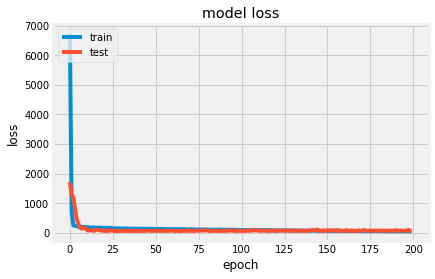

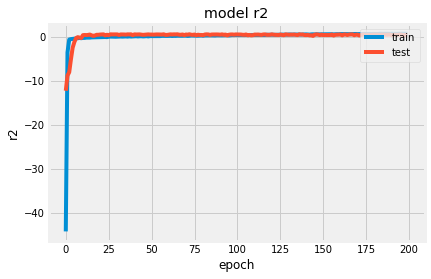

In [ ]:
# Plot Loss & R2 metric.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae
# Passing the Test data through the trained model & storing the results on disk.

Dtest = pd.read_csv(r'/content/drive/My Drive/mercedes data/test.csv.csv')

# predict results
res = model.predict(test).ravel()
print(res)

# create df and convert it to csv
output = pd.DataFrame({'id': Dtest["ID"], 'y': res})
output.to_csv('keras-baseline.csv', index=False)

[ 87.58462   96.93987   78.10099  ...  99.04886  108.895775  94.63653 ]


# **2.3 Stacking regression**

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

warnings.simplefilter('ignore')

In [ ]:
sv = SVR(C=10, cache_size=200,degree=3, epsilon=0.1, gamma='scale',kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    
rs4 = DecisionTreeRegressor()
clf_ele_best = SGDRegressor(loss='epsilon_insensitive', random_state=42)
clf_l2_best = SGDRegressor(loss='squared_loss',random_state=42)
xgb_hyp = XGBRegressor(learning_rate =0.01,max_depth=2,n_estimators=800,n_jobs = -1)
rfb = RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=8,n_estimators=100, max_depth=6,n_jobs=-1)

rfb1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                      max_depth=4, max_features='log2', 
                      max_samples=None, 
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, 
                       verbose=0, warm_start=False)
knn = KNeighborsRegressor(n_neighbors=15,metric='manhattan',n_jobs=-1)

In [ ]:
stregr = StackingRegressor(regressors=[rs4,sv, clf_ele_best, clf_l2_best,rfb, xgb_hyp, knn], 
                           meta_regressor=rfb1)

In [ ]:
# Training the stacking classifier

stregr.fit(X_tr_norm, y_train)


[15:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features='log2',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=200,
                       

In [ ]:
#R2 value
print('Train R-squared value:',stregr.score(X_tr_norm,y_train))
print('cv R-squared value:',stregr.score(X_cv_norm,y_cv))

Train R-squared value: 0.9034688674036856
cv R-squared value: 0.4705469561655702


In [ ]:
y_pred_cv_stregr = stregr.predict(X_cv_norm)

y_pred_train_stregr = stregr.predict(X_tr_norm)

In [ ]:
train_score_stregr =score(y_train, y_pred_train_stregr)
cv_score_stregr=score(y_cv, y_pred_cv_stregr)
print("Train score:",round(train_score_stregr,4))
print("Cross validation score:",round(cv_score_stregr,4))

Train score: 0.9035
Cross validation score: 0.4705


In [ ]:
y_pred_test_stregr = stregr.predict(X_test_norm)
y_pred_test_stregr

array([ 76.71741149, 117.50236465,  77.58539136, ...,  90.66657063,
       109.32405347, 105.0906118 ])

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_stregr
submission.to_csv('Predictions_stacking.csv', index=False)

we can clearly seen that there is no good results after using stacking model.
sampling with reopalcements gives us better results.

XGB model and Decisiosn tree also gives us better performance value

It can be obseved from our different results that threr is no improvement in performance metrics r2 by using deep learning model as a metaregressor.

also there is no good result by stacking the models.

We will create the result table here so will get clear Idea

In [ ]:
#https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions

# **Result Table for models**

In [ ]:

from prettytable import PrettyTable

Table = PrettyTable()
row_names = ['d1_subsample','d2_subsample','d3_subsample','d4_subsample','d5_subsample']
Table.add_column("dataset",row_names)
Table.add_column('Train R2score',[0.9101 ,0.8878,0.7299,0.6706,0.6523 ])
Table.add_column('Private_Score',[0.38848,0.43751,0.54079,0.53857,0.54112 ])
Table.add_column('Public_Score',[ 0.43974,0.47860,0.54516,0.54545,0.55183])

print(Table)

+--------------+---------------+---------------+--------------+
|   dataset    | Train R2score | Private_Score | Public_Score |
+--------------+---------------+---------------+--------------+
| d1_subsample |     0.9101    |    0.38848    |   0.43974    |
| d2_subsample |     0.8878    |    0.43751    |    0.4786    |
| d3_subsample |     0.7299    |    0.54079    |   0.54516    |
| d4_subsample |     0.6706    |    0.53857    |   0.54545    |
| d5_subsample |     0.6523    |    0.54112    |   0.55183    |
+--------------+---------------+---------------+--------------+


In [ ]:
from prettytable import PrettyTable

Table = PrettyTable()

row_names = ['LineaRegression','Linear regressor with L 2 penalty','Linear regression elastic net','XG boost regression','SVR ','SVMregression using SGD regressor','keras baseline','stacking','Decision Tree Regressor','KNN regressor','RandomforestRegressor','MetaRegression']





Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.6035, 0.5855, 0.5138, 0.6988, 0.5976,0.2254,0.55692,0.9035,0.5795,0.5404,0.574, 0.5802 ])


Table.add_column('Private_Score',[0.52076, 0.519, 0.48076, 0.54077, 0.50058,0.25316,0.43435,0.42882,0.53483,0.48576,0.530 ,0.54310])
Table.add_column('Public_Score',[0.53357, 0.519, 0.482, 0.55502, 0.516,0.20175,0.43030,0.43206,0.55,0.50,0.53745,0.55049 ])




print(Table)

+-----------------------------------+---------------+---------------+--------------+
|               Model               | Train R2score | Private_Score | Public_Score |
+-----------------------------------+---------------+---------------+--------------+
|          LineaRegression          |     0.6035    |    0.52076    |   0.53357    |
| Linear regressor with L 2 penalty |     0.5855    |     0.519     |    0.519     |
|   Linear regression elastic net   |     0.5138    |    0.48076    |    0.482     |
|        XG boost regression        |     0.6988    |    0.54077    |   0.55502    |
|                SVR                |     0.5976    |    0.50058    |    0.516     |
| SVMregression using SGD regressor |     0.2254    |    0.25316    |   0.20175    |
|           keras baseline          |    0.55692    |    0.43435    |    0.4303    |
|              stacking             |     0.9035    |    0.42882    |   0.43206    |
|      Decision Tree Regressor      |     0.5795    |    0.53483 

# **Conclusions**

It is observed that Decision tree regressor XGB and Fandom Forest regressor gives us better value than other models.

In bootstrap sampling (sampling with replacement ) gives better results among all models.Meta regressor rfb1 gives us best results than individual subsample models .

stacking all the models does not gives us satisfactory results.

we can see variation from result table


# **Steps followed**

After loading the datset we defined thr objeective of case study to reduce test time at test bed and reduce the emissions of GHG.
We set R2 as a perform,ance meric as we have one dependent varible 'y'.
The first basic step was to carry out EDA on the train & test data. This included finding datatypes of all features followed by Univariate Analysis of the target variable(y) & the ID feature where the outliers were removed from the data

Next was the univariate analysis of categorical variables(X1,,,X8) in both train & test data .We seen in both dataset categorical geatures contains more value in columns while others with binary values 0 and 1.also we drawn  important conclusions  regarding the difference between train & test data. This was followed by Univariate Analysis of integer/binary columns where unique values and counts of the values was observed.ate that we stopped EDA

The next important stage was Data cleaning where features were eliminated considering variance in the respective columns, & the duplicate columns. These continuous series of  of operations resulted in the elimination of 162 weak columns.

Data cleaning was followed by feature engineering where 3,2-way and 1 three-way interactions were added and mmore columns were eliminated which showed extreme positive & negative correlation using the thresholds -0.95 & +0.95 respectively. Therefore, the final data had 186 important features.

Next, feature importance was determined by a XGBoost regressor and it was severly observed that the feature interactions had a lot of influence on the target variable('y').

Once we get final, clean & processed data  the next successive  stage was modelling where we ran different models like XGB,Random forest Regressor,Linear regressor,SVR,Knn Regressor,Decision tree regressor.I used one hot encoding for categorical features.Among them XGBoost regressor performed best with highest R2 score.

 Applied Ai team suggested me bootstrap sampling for this case study-Row sampling with replacement.For that We  created dataset such that training data was dividved in two equal halves.

dataset1(D1) and dataset2(D2) , on dataset 1 we  created 5 different samples with sampling with replacement such that d1,d2,d3,d4,d5(sample size=1683)

We trained the model on each of this dataset(we used XGB regressor)

Now in d1 it contains both data as well as the label(X_train,Y_train) so splited here to: x1,y1. where y1 is the label for x1 sample of size k

xgb_d1 is model for 1st sample so xgb1.train(X_1,Y_1).

This is training part we follow same procedure remaining samples too d2,d3,d4,d5.by which we will get xgb_d2,xgb_d3,xgb_d4,xgb_d5

now D2(datset2) has both target as well as Data. Splited it in Xd2 , yd2

Now we passed 'Xd2' to all the m xgb models that we created.

Now we trained the model with these new features(Meta regressor)Random forest model.fit(Pm,yd2)

same datset with features we created (pd12) for test prediction and combined them for final prediction.

We observedthat there were good resilts after sampling with replacement on ths dataset.
we tried here two meta regressors Random forest and  Neural Network with adam optimizers .among which Random forest gives us better results.

Then we performed stacking on this which also gives us poor value than individual models.

This model gives us best result (R2 value )



Test predictions were made using the best model and the prediction csv file was uploaded on kaggle to get the final R2 score.








